# SpaceX Rocket Classification
<br></br>
Group Members
- Lim Jason 1802103 P8
- Lok Xuan Wen 1801205 P8
- Lee Jia Sheng 1902018 P8 
- See Ling Xuan 1901373 P4
- Chuah Wenn Jing 1902142 P4

## Index

1. [Import Python Libraries](#Import-Python-Libraries)
2. [Data Collection](#Data-Collection)
3. [Data Exploration](#Data-Exploration)
4. [Data Visualization](#Data-Visualization)
5. [Principal Component Analysis](#Principal-Component-Analysis)
6. [Data Preprocessing](#Data-Preprocessing)
7. [Declare Functions](#Declare-Functions)
8. [Model Training](#Model-Training)
9. [Fine Tune Model](#Fine-Tune-Model)
10. [Model Testing](#Model-Testing)
11. [Feature Importance](#Feature-Importance)
---

# Import Python Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler
import warnings
import chart_studio
import chart_studio.plotly as py
import chart_studio.tools as tls
warnings.filterwarnings('ignore')

%matplotlib inline
pd.options.mode.chained_assignment = None

# Chart Studio - To export plotly charts to powerpoint
username = 'Jason0711'
api_key = 'faJBzwK55KksD96Hd737'
chart_studio.tools.set_credentials_file(username=username, api_key=api_key)

# Data Collection

In [2]:
data = pd.read_csv("dataset.csv", na_values = "?")

# Data Exploration

<i>(Done by: Lim Jason)</i>

In [3]:
data.head(5)

FlightNumber        Date BoosterVersion  PayloadMass Orbit    LaunchSite  \
0             1  2010-06-04       Falcon 9  6104.959412   LEO  CCAFS SLC 40   
1             2  2012-05-22       Falcon 9   525.000000   LEO  CCAFS SLC 40   
2             3  2013-03-01       Falcon 9   677.000000   ISS  CCAFS SLC 40   
3             4  2013-09-29       Falcon 9   500.000000    PO   VAFB SLC 4E   
4             5  2013-12-03       Falcon 9  3170.000000   GTO  CCAFS SLC 40   

       Outcome  Flights  GridFins  Reused   Legs LandingPad  Block  \
0    None None        1     False   False  False        NaN    1.0   
1    None None        1     False   False  False        NaN    1.0   
2    None None        1     False   False  False        NaN    1.0   
3  False Ocean        1     False   False  False        NaN    1.0   
4    None None        1     False   False  False        NaN    1.0   

   ReusedCount Serial   Longitude   Latitude  Class  
0            0  B0003  -80.577366  28.561857      0  
1            0  B0005  -80.577366  28.561857      0  
2            0  B0007  -80.577366  28.561857      0  
3            0  B1003 -120.610829  34.632093      0  
4            0  B1004  -80.577366  28.561857      0

In [4]:
data.isnull().sum()

FlightNumber       0
Date               0
BoosterVersion     0
PayloadMass        0
Orbit              0
LaunchSite         0
Outcome            0
Flights            0
GridFins           0
Reused             0
Legs               0
LandingPad        26
Block              0
ReusedCount        0
Serial             0
Longitude          0
Latitude           0
Class              0
dtype: int64

In [5]:
#Shape of dataset
print("Number of Features: ", data.shape[1])
print("Number of Instances: ", data.shape[0])

Number of Features:  18
Number of Instances:  90


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   FlightNumber    90 non-null     int64  
 1   Date            90 non-null     object 
 2   BoosterVersion  90 non-null     object 
 3   PayloadMass     90 non-null     float64
 4   Orbit           90 non-null     object 
 5   LaunchSite      90 non-null     object 
 6   Outcome         90 non-null     object 
 7   Flights         90 non-null     int64  
 8   GridFins        90 non-null     bool   
 9   Reused          90 non-null     bool   
 10  Legs            90 non-null     bool   
 11  LandingPad      64 non-null     object 
 12  Block           90 non-null     float64
 13  ReusedCount     90 non-null     int64  
 14  Serial          90 non-null     object 
 15  Longitude       90 non-null     float64
 16  Latitude        90 non-null     float64
 17  Class           90 non-null     int64

In [7]:
data.groupby('Class').size()

Class
0    30
1    60
dtype: int64

In [8]:
data.columns

Index(['FlightNumber', 'Date', 'BoosterVersion', 'PayloadMass', 'Orbit',
       'LaunchSite', 'Outcome', 'Flights', 'GridFins', 'Reused', 'Legs',
       'LandingPad', 'Block', 'ReusedCount', 'Serial', 'Longitude', 'Latitude',
       'Class'],
      dtype='object')

## Categorical Features Analysis

In [9]:
cat_data = data.select_dtypes(include= object)
cat_data.head()

Date BoosterVersion Orbit    LaunchSite      Outcome LandingPad  \
0  2010-06-04       Falcon 9   LEO  CCAFS SLC 40    None None        NaN   
1  2012-05-22       Falcon 9   LEO  CCAFS SLC 40    None None        NaN   
2  2013-03-01       Falcon 9   ISS  CCAFS SLC 40    None None        NaN   
3  2013-09-29       Falcon 9    PO   VAFB SLC 4E  False Ocean        NaN   
4  2013-12-03       Falcon 9   GTO  CCAFS SLC 40    None None        NaN   

  Serial  
0  B0003  
1  B0005  
2  B0007  
3  B1003  
4  B1004

In [10]:
cat_data.select_dtypes('object').nunique()

Date              90
BoosterVersion     1
Orbit             11
LaunchSite         3
Outcome            8
LandingPad         5
Serial            53
dtype: int64

As we can observe, the date feature has been stored as object data type and later needs to be converted into date type. Also, since the BoosterVersion feature only has one value, we can remove this feature entirely.

In [11]:
for col in cat_data.columns:
        print(col,":")
        print(cat_data[col].value_counts(), "\n")

Date :
2010-06-04    1
2019-08-06    1
2019-06-12    1
2019-05-24    1
2019-05-04    1
             ..
2017-03-30    1
2017-03-16    1
2017-02-19    1
2017-01-14    1
2020-11-05    1
Name: Date, Length: 90, dtype: int64 

BoosterVersion :
Falcon 9    90
Name: BoosterVersion, dtype: int64 

Orbit :
GTO      27
ISS      21
VLEO     14
PO        9
LEO       7
SSO       5
MEO       3
ES-L1     1
HEO       1
SO        1
GEO       1
Name: Orbit, dtype: int64 

LaunchSite :
CCAFS SLC 40    55
KSC LC 39A      22
VAFB SLC 4E     13
Name: LaunchSite, dtype: int64 

Outcome :
True ASDS      41
None None      19
True RTLS      14
False ASDS      6
True Ocean      5
False Ocean     2
None ASDS       2
False RTLS      1
Name: Outcome, dtype: int64 

LandingPad :
5e9e3032383ecb6bb234e7ca    35
5e9e3032383ecb267a34e7c7    13
5e9e3033383ecbb9e534e7cc    12
5e9e3032383ecb761634e7cb     2
5e9e3032383ecb554034e7c9     2
Name: LandingPad, dtype: int64 

Serial :
B1049    6
B1051    5
B1059    4
B1056    4


From observing the categorical data, we can see that there are only nominal features in this dataset. For nominal features, we can simply use one hot encoding as we do not need to reserve the order unlike ordinal features. For the feature Serial, it has 53 unique value which would drastically increase the size after we apply one hot encoding.

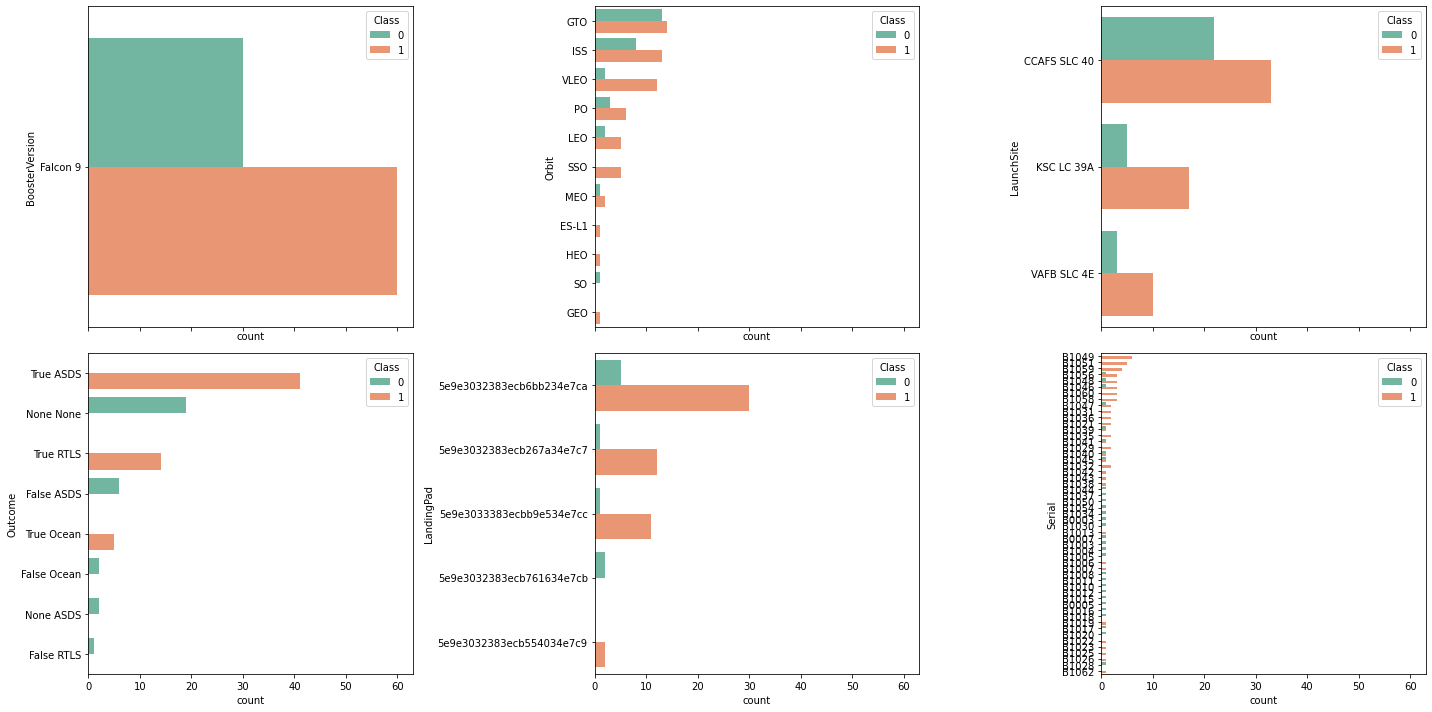

In [12]:
df = cat_data.drop(['Date'], axis=1)

fig, axes =plt.subplots(2,3, figsize=(20,10), sharex=True)
axes = axes.flatten()

for ax, col in zip(axes, df):
    sns.countplot(y=col, hue='Class', data=data, ax=ax, order = df[col].value_counts().index, palette='Set2')

plt.tight_layout()  
plt.show()

From the visualization above, we can observe that most of the features except Serial have quite a good correlation with the output class. Upon taking a closer look at Serial, it is very diverse and many of them hold less amount of decision as compared to other features.

## Numerical Features Analysis

In [13]:
data.describe()

FlightNumber   PayloadMass    Flights      Block  ReusedCount  \
count     90.000000     90.000000  90.000000  90.000000    90.000000   
mean      45.500000   6104.959412   1.788889   3.500000     1.655556   
std       26.124701   4694.671720   1.213172   1.595288     1.710254   
min        1.000000    350.000000   1.000000   1.000000     0.000000   
25%       23.250000   2510.750000   1.000000   2.000000     0.000000   
50%       45.500000   4701.500000   1.000000   4.000000     1.000000   
75%       67.750000   8912.750000   2.000000   5.000000     3.000000   
max       90.000000  15600.000000   6.000000   5.000000     5.000000   

        Longitude   Latitude      Class  
count   90.000000  90.000000  90.000000  
mean   -86.366477  29.449963   0.666667  
std     14.149518   2.141306   0.474045  
min   -120.610829  28.561857   0.000000  
25%    -80.603956  28.561857   0.000000  
50%    -80.577366  28.561857   1.000000  
75%    -80.577366  28.608058   1.000000  
max    -80.577366  34.632093   1.000000

### Skewness

In [14]:
skewPayloadMass = data.PayloadMass.skew(axis = 0, skipna = True)
print('PayloadMass skewness: ', skewPayloadMass)

PayloadMass skewness:  0.9883780294513994


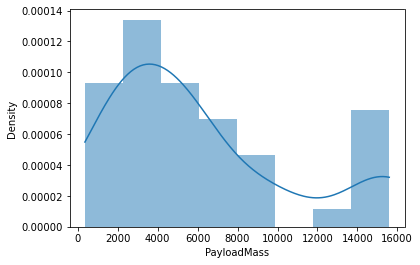

In [15]:
sns.histplot(data=data, x="PayloadMass", kde=True, stat="density", linewidth=0)

In [16]:
skewFlights = data.Flights.skew(axis = 0, skipna = True)
print('Flights skewness: ', skewFlights)

Flights skewness:  1.7299868012565818


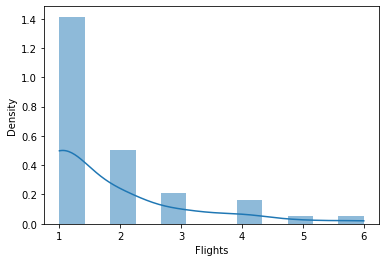

In [17]:
sns.histplot(data=data, x="Flights", kde=True, stat="density", linewidth=0)

In [18]:
skewReusedCount = data.ReusedCount.skew(axis = 0, skipna = True)
print('ReusedCount skewness: ', skewReusedCount)

ReusedCount skewness:  0.8032591901966765


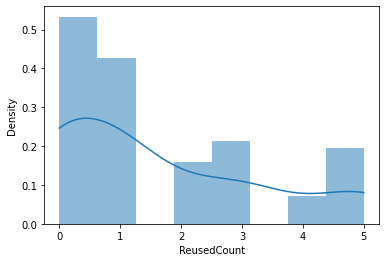

In [19]:
sns.histplot(data=data, x="ReusedCount", kde=True, stat="density", linewidth=0)

In [20]:
skewBlock = data.Block.skew(axis = 0, skipna = True)
print('ReusedCount skewness: ', skewBlock)

ReusedCount skewness:  -0.5264601162161819


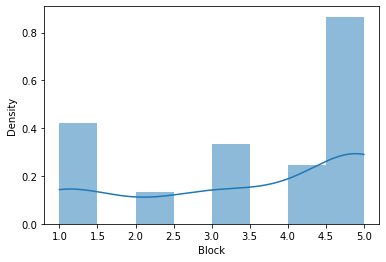

In [21]:
sns.histplot(data=data, x="Block", kde=True, stat="density", linewidth=0)

## Correlation

1. Gives quantifiable relationship between features
2. Corr is calculated using various methods like 'pearson', 'spearman', etc.
3. Corr can be represented using correlation heatmap

In [22]:
data.corr()

FlightNumber  PayloadMass   Flights  GridFins    Reused  \
FlightNumber      1.000000     0.596307  0.652842  0.442364  0.635844   
PayloadMass       0.596307     1.000000  0.665218  0.258011  0.468393   
Flights           0.652842     0.665218  1.000000  0.194457  0.782631   
GridFins          0.442364     0.258011  0.194457  1.000000  0.229341   
Reused            0.635844     0.468393  0.782631  0.229341  1.000000   
Legs              0.373619     0.192318  0.157727  0.902302  0.155552   
Block             0.932411     0.518165  0.519603  0.438023  0.548036   
ReusedCount       0.735193     0.612327  0.684802  0.410324  0.594109   
Longitude         0.055256     0.016181  0.085228 -0.143677 -0.042160   
Latitude         -0.054194    -0.014655 -0.084547  0.144427  0.042669   
Class             0.401923     0.199992  0.149787  0.642540  0.207582   

                  Legs     Block  ReusedCount  Longitude  Latitude     Class  
FlightNumber  0.373619  0.932411     0.735193   0.055256 -0.054194  0.401923  
PayloadMass   0.192318  0.518165     0.612327   0.016181 -0.014655  0.199992  
Flights       0.157727  0.519603     0.684802   0.085228 -0.084547  0.149787  
GridFins      0.902302  0.438023     0.410324  -0.143677  0.144427  0.642540  
Reused        0.155552  0.548036     0.594109  -0.042160  0.042669  0.207582  
Legs          1.000000  0.368994     0.375496  -0.057701  0.058161  0.673825  
Block         0.368994  1.000000     0.743340  -0.030037  0.031621  0.416015  
ReusedCount   0.375496  0.743340     1.000000  -0.101877  0.102668  0.466584  
Longitude    -0.057701 -0.030037    -0.101877   1.000000 -0.999966 -0.089519  
Latitude      0.058161  0.031621     0.102668  -0.999966  1.000000  0.090782  
Class         0.673825  0.416015     0.466584  -0.089519  0.090782  1.000000

Text(0.5, 1.0, '- Correlation matrix and Heatmap -')

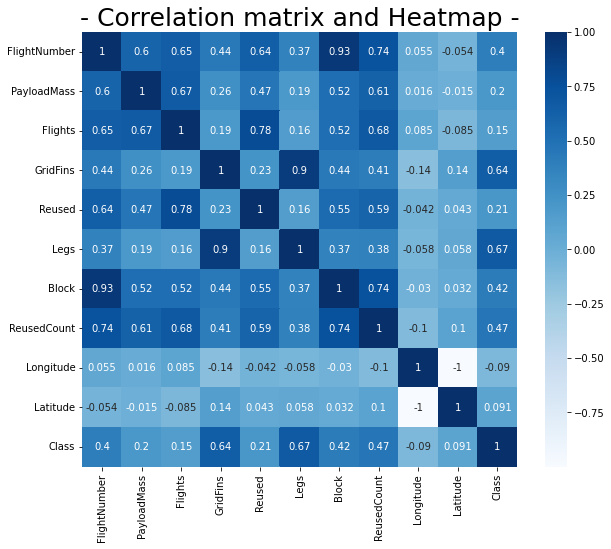

In [23]:
plt.figure(figsize =(10,8))
corrmat = data.corr()
sns.heatmap(corrmat, square=True, annot=True, cbar=True, cmap="Blues");  #Blues
plt.title('- Correlation matrix and Heatmap -',fontsize = 25)

FlightNumber and Block, GridFins and Legs both have strong positive correlation. Hence, we can decide on a later point choose either one feature from each pair and drop it.

---
# Data Visualization

<i>(Done by: All members)</i>

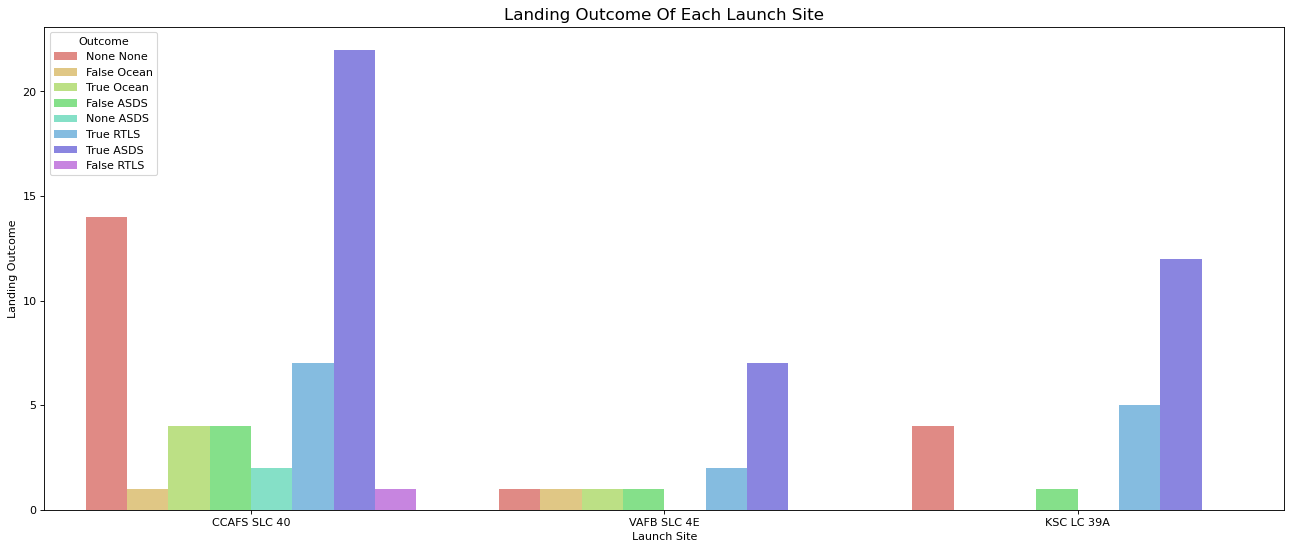

In [24]:
# Visualize the landing outcome of each launch site to know which launch side had the most successful landings 

plt.figure(figsize = (20,8), dpi = 80)
sns.countplot(x = "LaunchSite", data = data, hue = "Outcome", palette = sns.hls_palette(9,l=.7,s=.8));
plt.title("Landing Outcome Of Each Launch Site", fontsize = 15)
plt.xlabel("Launch Site")
plt.ylabel("Landing Outcome")
plt.show()

<Figure size 1600x640 with 0 Axes>

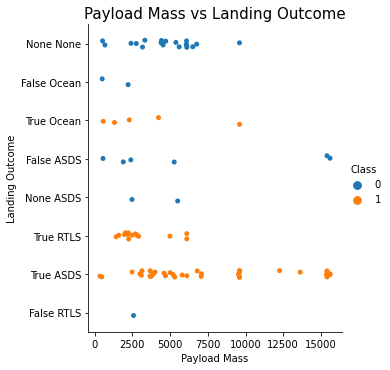

In [25]:
# Visualize the relationship between payload mass and landing outcome

x = data.loc[:,"PayloadMass"]
y = data.loc[:,"Outcome"]

plt.figure(figsize = (20,8), dpi = 80)
# sns.palplot(sns.hls_palette(9,l=.7,s=.8))
# plt.scatter(x,y)
# sns.catplot(x='PayloadMass',y='Orbit',data=data,hue='Class')

sns.catplot(x = 'PayloadMass',y = 'Outcome',data = data,hue = 'Class')

plt.title("Payload Mass vs Landing Outcome", fontsize = 15)
plt.xlabel("Payload Mass")
plt.ylabel("Landing Outcome")
plt.show()

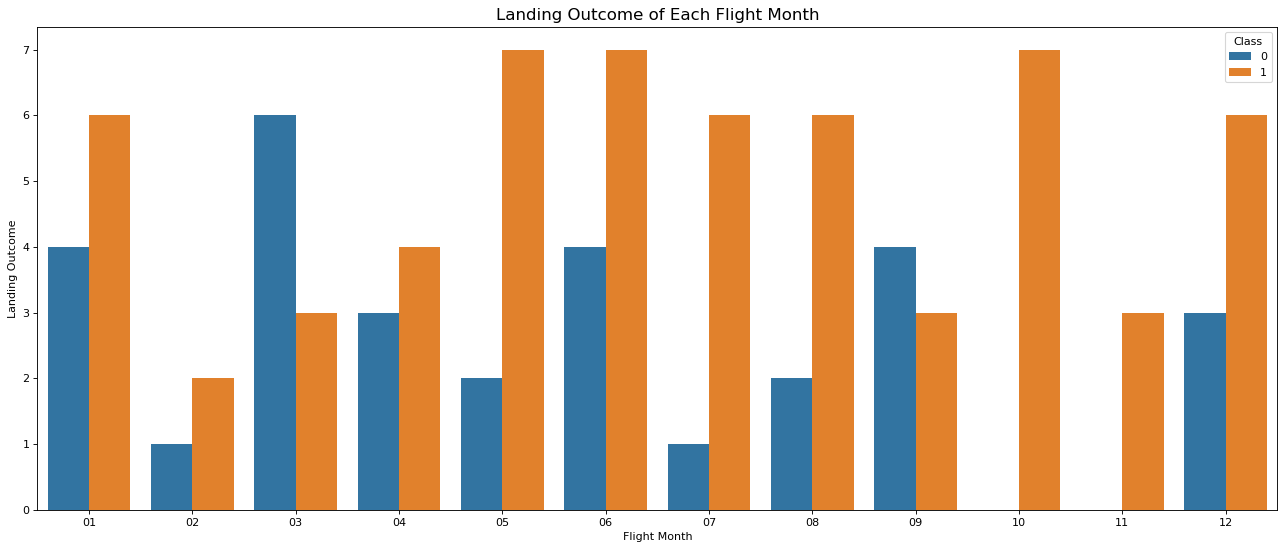

In [26]:
# Visualize the relationship between the flight month and the landing outcome
flight_month = data.loc[:, "Date"].apply(lambda x:x.split('-')[1])

data_copy = data.copy(deep = True)
data_copy["Date"] = flight_month.values

plt.figure(figsize = (20,8), dpi = 80)
sns.countplot(x = "Date", data = data_copy, hue = "Class", order = ['01','02','03','04','05','06','07','08','09','10','11','12'])
plt.title("Landing Outcome of Each Flight Month", fontsize = 15)
plt.xlabel("Flight Month")
plt.ylabel("Landing Outcome")
plt.show()


In [27]:
visual = data.groupby(['LaunchSite','Longitude','Latitude']).count().reset_index()
visual['TotalMass'] = data.groupby(['LaunchSite','Longitude','Latitude']).sum().reset_index()['PayloadMass'] 
visual['text'] = 'Launch Site: ' + visual['LaunchSite'] + '<br>Number of Flights: ' + visual['Flights'].astype(str) + '<br>Total Payload Mass: ' + visual['TotalMass'].astype(int).astype(str)

fig = go.Figure(data=go.Scattergeo(
        locationmode = 'USA-states',
        lon = visual['Longitude'],
        lat = visual['Latitude'],
        text = visual['text'],
        mode = 'markers',
        marker = dict(
            size = 8,
            opacity = 0.8,
            reversescale = True,
            autocolorscale = False,
            symbol = 'square',
            line = dict(
                width=1,
                color='rgba(102, 102, 102)'
            ),
            colorscale = 'Blues',
            cmin = 0,
            color = visual['Flights'],
            cmax = visual['Flights'].max(),
            colorbar_title="Number of Flights"
        )))

fig.update_layout(
        title = 'Location, Number of Flights and Total Payload Mass from each Launch Site<br>(Hover for more details)',
        geo = dict(
            scope='usa',
            projection_type='albers usa',
            showland = True,
            landcolor = "rgb(250, 250, 250)",
            subunitcolor = "rgb(217, 217, 217)",
            countrycolor = "rgb(217, 217, 217)",
            countrywidth = 0.5,
            subunitwidth = 0.5
        ),
    )

fig.show()

In [28]:
py.plot(fig, filename='Location, Number of Flights and Total Payload Mass from each Launch Site', auto_open=False)

'https://plotly.com/~Jason0711/1/'

Text(0, 0.5, 'Number of Reused Parts')

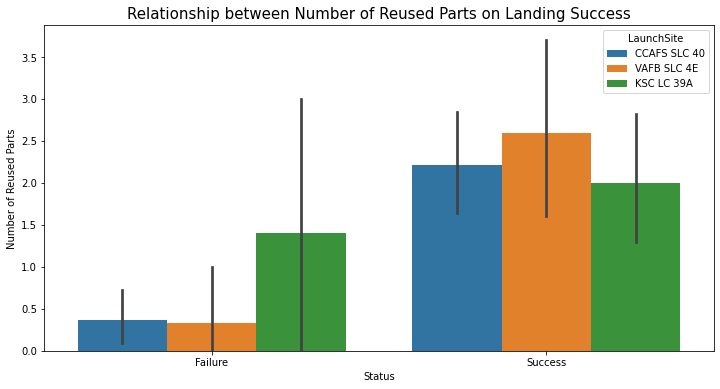

In [29]:
vis = data.copy()
vis['Status'] = data['Class'].apply(lambda x: 'Success' if x == 1 else 'Failure')

plt.figure(figsize=(12,6))

ax = sns.barplot(x='Status',
                 y='ReusedCount',
                 data=vis, 
                 hue='LaunchSite')

plt.title('Relationship between Number of Reused Parts on Landing Success', fontsize=15)
plt.ylabel('Number of Reused Parts')

Text(0.5, 0, 'Orbits')

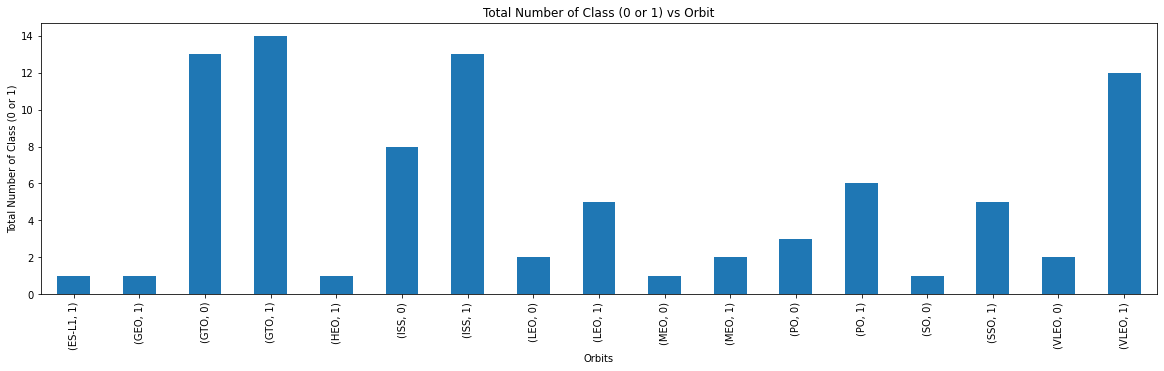

In [30]:
df_new = data.groupby(['Orbit', 'Class'])['Class'].count()
df_new.plot(kind='bar', figsize=(20, 5))
plt.title('Total Number of Class (0 or 1) vs Orbit')
plt.ylabel('Total Number of Class (0 or 1)')
plt.xlabel('Orbits')

Text(0, 0.5, 'Payload Mass')

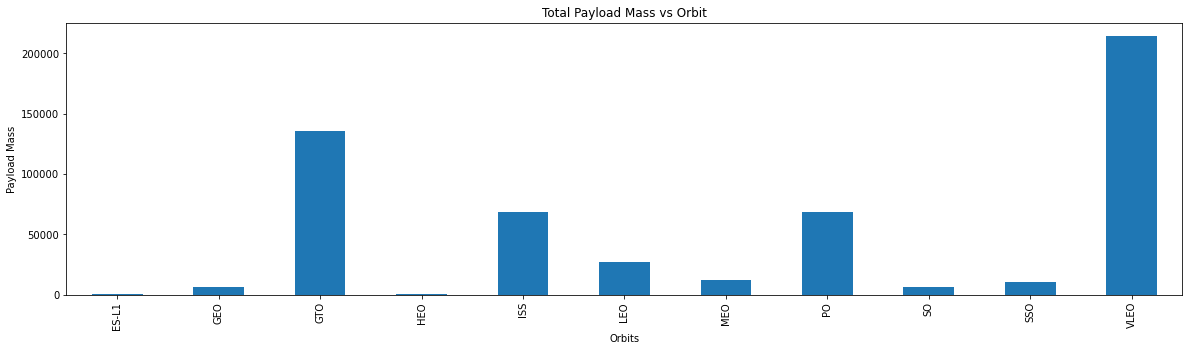

In [31]:
df_new1 = data.groupby(['Orbit'])['PayloadMass'].sum()
df_new1.plot(kind='bar', figsize=(20, 5))
plt.title('Total Payload Mass vs Orbit')
plt.xlabel('Orbits')
plt.ylabel('Payload Mass')

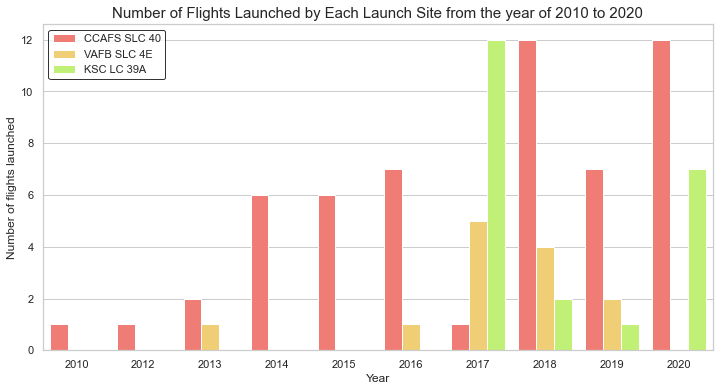

In [32]:
#Visualization of the number of flights launched by each launch site in each year

#Obtain "Year" values from the date of each flight
def get_year():
    for i in df['Date']:
        year.append(i.split("-")[0])
    return year
   
year = []
df = data.copy()
year = get_year()
df['Date'] = year
#df.head()


plt.figure(figsize = (12,6))
sns.set(style="whitegrid")
sns.countplot(x = 'Date', 
              data = df,
              hue = 'LaunchSite', 
              palette = sns.hls_palette(9,l=.7,s=.8), saturation = 1.5)


plt.title('Number of Flights Launched by Each Launch Site from the year of 2010 to 2020', fontsize = 15)
plt.ylabel('Number of flights launched')
plt.xlabel('Year')
#plt.legend(loc='upper left', frameon=True)
leg = plt.legend(loc='upper left')
leg.get_frame().set_edgecolor('black')
plt.show()

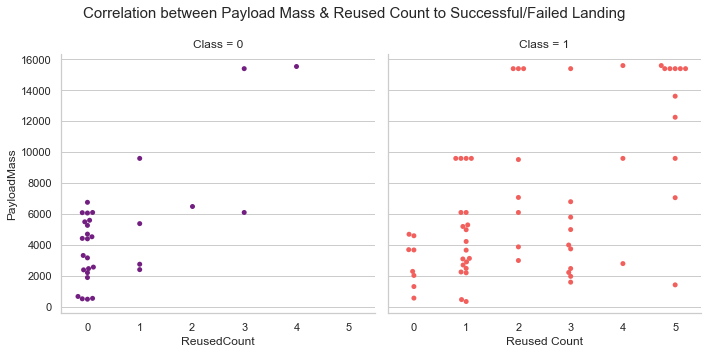

In [33]:
sns.catplot(x='ReusedCount', 
            y='PayloadMass', 
            data=data, 
            hue='Class',  
            col='Class',  
            kind='swarm', 
            palette = 'magma')

#sns.displot(x = 'ReusedCount', data = data[data.ReusedCount.isin([1,2,3,4,5])],
            #col = 'Class', row = 'ReusedCount',
            #hue = 'Orbit', palette = 'colorblind')
            #facet_kws={'despine': True}

plt.subplots_adjust(top = 0.85)
plt.suptitle('Correlation between Payload Mass & Reused Count to Successful/Failed Landing', fontsize = 15)
plt.ylabel('Payload Mass')
plt.xlabel('Reused Count')
#plt.legend(loc='lower right')
plt.show()

Text(0, 0.5, 'Total Number')

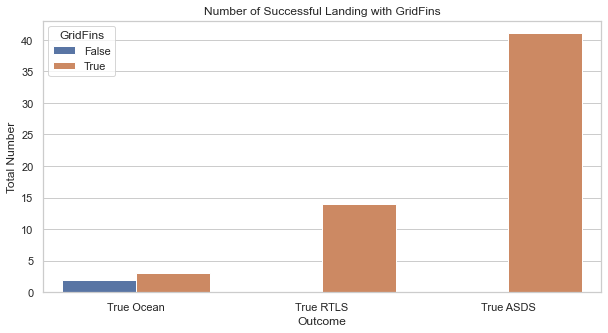

In [34]:
data1 = df.loc[df['Outcome'].isin(['True Ocean','True ASDS','True RTLS'])]
#data1.head()
#total = data1.GridFins.count()
sns.set(style="whitegrid")

plt.figure(figsize=(10,5))

vs1 = sns.countplot( data=data1,x='Outcome',hue='GridFins')

plt.title('Number of Successful Landing with GridFins')
plt.ylabel('Total Number')

Text(0.5, 0, 'Outcome')

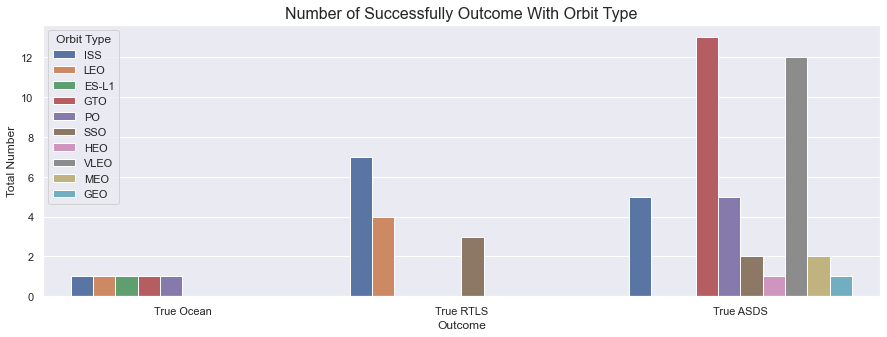

In [35]:
#Visualization of Total Number of true outcome with which Orbit
sns.set(style="darkgrid")

plt.figure(figsize=(15,5))

vs1 = sns.countplot(x = 'Outcome',data=data1, hue='Orbit')
plt.legend(loc='upper left', title='Orbit Type')

plt.title('Number of Successfully Outcome With Orbit Type',fontsize = 16)
plt.ylabel('Total Number')
plt.xlabel('Outcome')

---
# Object Queries

<i>(Done by: All members)</i>

1) To find out how many times the core with the specified serial number has been reused

In [36]:
display = data.groupby(['Serial']).sum()['ReusedCount'].sort_values(ascending=False).reset_index()
print(display[display.ReusedCount > 0])

   Serial  ReusedCount
0   B1049           30
1   B1051           25
2   B1048           16
3   B1046           12
4   B1059           12
5   B1056           12
6   B1060            6
7   B1058            6
8   B1047            6
9   B1029            2
10  B1039            2
11  B1021            2
12  B1040            2
13  B1041            2
14  B1032            2
15  B1035            2
16  B1045            2
17  B1036            2
18  B1031            2
19  B1043            1
20  B1023            1
21  B1025            1
22  B1038            1


2) To determine the total payload mass for each launch site

In [37]:
data.groupby(['LaunchSite']).sum()['PayloadMass']

LaunchSite
CCAFS SLC 40    305151.428235
KSC LC 39A      167341.918824
VAFB SLC 4E      76953.000000
Name: PayloadMass, dtype: float64

3) To find the outcome with using grid fins

In [38]:
data.groupby(['Outcome']).sum()['GridFins']

Outcome
False ASDS      6
False Ocean     0
False RTLS      1
None ASDS       2
None None       3
True ASDS      41
True Ocean      3
True RTLS      14
Name: GridFins, dtype: int64

4) To determine the total number of successful landing for each orbit type

In [39]:
data.groupby(['Orbit']).sum()['Class']

Orbit
ES-L1     1
GEO       1
GTO      14
HEO       1
ISS      13
LEO       5
MEO       2
PO        6
SO        0
SSO       5
VLEO     12
Name: Class, dtype: int64

5) To determine the total payload mass carried out by boosters launch by Nasa (CRS)

In [40]:
data.groupby(['BoosterVersion']).sum()['PayloadMass']

BoosterVersion
Falcon 9    549446.347059
Name: PayloadMass, dtype: float64

---
# Principal Component Analysis

<i>(Done by: Lim Jason)</i>

This step is important to help us understand the predictive power of our classification model for continuous or numerical data

In [41]:
from sklearn.decomposition import PCA

pcadata = data.select_dtypes(include = {int, float}).drop(["FlightNumber","Longitude","Latitude","Class"], axis = 1)

#Scale the data
scaler = StandardScaler()
scaler.fit(pcadata)
scaled = scaler.transform(pcadata)

#Obtain principal components
pca = PCA().fit(scaled)

In [42]:
scores = pca.transform(scaled)
scores_df = pd.DataFrame(scores, columns=['PC1', 'PC2', 'PC3', 'PC4'])
scores_df

PC1       PC2       PC3       PC4
0  -1.605337 -1.047506 -0.293590  0.313151
1  -2.184025 -0.416524  0.536815  0.235761
2  -2.168261 -0.433712  0.514195  0.237869
3  -2.186617 -0.413697  0.540536  0.235415
4  -1.909716 -0.715621  0.143189  0.272446
..       ...       ...       ...       ...
85  1.615682 -0.434161 -1.434896 -0.268196
86  2.029807 -0.795555 -0.901188 -0.584634
87  4.210246 -1.388063  1.105948 -0.183032
88  2.029807 -0.795555 -0.901188 -0.584634
89 -0.639177  0.924634 -0.495268 -1.014902

[90 rows x 4 columns]

In [43]:
Y_label = []

for i in data.Class:
  if i == 0:
    Y_label.append('Fail')
  elif i == 1:
    Y_label.append('Success')

Class = pd.DataFrame(Y_label, columns=['Class'])
df_scores = pd.concat([scores_df, Class], axis=1)

In [44]:
loadings = pca.components_.T
df_loadings = pd.DataFrame(loadings, columns=['PC1', 'PC2','PC3', 'PC4'], index=pcadata.columns)
df_loadings

PC1       PC2       PC3       PC4
PayloadMass  0.484164 -0.527915 -0.694765  0.064749
Flights      0.499605 -0.435991  0.643871 -0.381754
Block        0.482878  0.673442 -0.223052 -0.513373
ReusedCount  0.531797  0.278735  0.230173  0.765845

In [45]:
explained_variance = pca.explained_variance_ratio_
explained_variance = np.insert(explained_variance, 0, 0)
cumulative_variance = np.cumsum(np.round(explained_variance, decimals=3))

pc_df = pd.DataFrame(['','PC1', 'PC2', 'PC3','PC4'], columns=['PC'])
explained_variance_df = pd.DataFrame(explained_variance, columns=['Explained Variance'])
cumulative_variance_df = pd.DataFrame(cumulative_variance, columns=['Cumulative Variance'])

In [46]:
df_explained_variance = pd.concat([pc_df, explained_variance_df, cumulative_variance_df], axis=1)
df_explained_variance

PC  Explained Variance  Cumulative Variance
0                 0.000000                0.000
1  PC1            0.718948                0.719
2  PC2            0.141270                0.860
3  PC3            0.086751                0.947
4  PC4            0.053032                1.000

In [47]:
fig = px.bar(df_explained_variance, 
             x='PC', y='Explained Variance',
             text='Explained Variance',
             width=800)

fig.update_traces(texttemplate='%{text:.3f}', textposition='outside')
fig.show()

In [48]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(
    go.Scatter(
        x=df_explained_variance['PC'],
        y=df_explained_variance['Cumulative Variance'],
        marker=dict(size=15, color="LightSeaGreen")
    ))

fig.add_trace(
    go.Bar(
        x=df_explained_variance['PC'],
        y=df_explained_variance['Explained Variance'],
        marker=dict(color="RoyalBlue")
    ))

fig.show()

* From the scree plot cumulative variance, we can observe that with 2 Principal Components, it can explain over 80% of variance.
* For the Principal Components to explain above 90% of variance, 3 Principal Components is needed.

In [49]:
fig = px.scatter(df_scores, x='PC1', y='PC2',
              color='Class',
              symbol='Class')

fig.show()

From the visualization, we can see some pattern in terms of majority data points locations. The blue points tend to have lower PC1 and PC2 and as the PC1 and PC2 value increases, the blue points are gradually decreasing.

Majority of red points are at around PC1 and PC2 value of 1.

In [50]:
fig = px.scatter_3d(df_scores, x='PC1', y='PC2', z='PC3',
              color='Class',
              symbol='Class',
              opacity=0.5)

# tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))

From the 3D interactive scatter plot depicting 3 principal components, we can observe that the groups doesn’t have a clear distinction and are quite intertwined. Upon scrolling around the plot, only can we notice that red points are mostly clumped up in the center area at PC values 0 to 2.

In [51]:
py.plot(fig, filename='3D PCA Chart', auto_open=True)

'https://plotly.com/~Jason0711/4/'

In [52]:
loadings_label = df_loadings.index

fig = px.scatter_3d(df_loadings, x='PC1', y='PC2', z='PC3',
                    text = loadings_label)

fig.show()

* From this visualization we can observe which features are the most important for each data clusters

---
# Data Preprocessing (Numerical Data)

<i>(Done by: Lim Jason)</i>

In [53]:
data.describe()

FlightNumber   PayloadMass    Flights      Block  ReusedCount  \
count     90.000000     90.000000  90.000000  90.000000    90.000000   
mean      45.500000   6104.959412   1.788889   3.500000     1.655556   
std       26.124701   4694.671720   1.213172   1.595288     1.710254   
min        1.000000    350.000000   1.000000   1.000000     0.000000   
25%       23.250000   2510.750000   1.000000   2.000000     0.000000   
50%       45.500000   4701.500000   1.000000   4.000000     1.000000   
75%       67.750000   8912.750000   2.000000   5.000000     3.000000   
max       90.000000  15600.000000   6.000000   5.000000     5.000000   

        Longitude   Latitude      Class  
count   90.000000  90.000000  90.000000  
mean   -86.366477  29.449963   0.666667  
std     14.149518   2.141306   0.474045  
min   -120.610829  28.561857   0.000000  
25%    -80.603956  28.561857   0.000000  
50%    -80.577366  28.561857   1.000000  
75%    -80.577366  28.608058   1.000000  
max    -80.577366  34.632093   1.000000

## Removed Output Vector

Class is our output vector and it will be removed for now, and added to the final training and test set.

In [54]:
data["Class"] = data["Class"].astype("bool")
ori_data = data.copy()
data.drop('Class', axis=1, inplace=True)

## Select Numerical Features

In [55]:
num_data = data.select_dtypes(include = {int, float})
num_data.head()

FlightNumber  PayloadMass  Flights  Block  ReusedCount   Longitude  \
0             1  6104.959412        1    1.0            0  -80.577366   
1             2   525.000000        1    1.0            0  -80.577366   
2             3   677.000000        1    1.0            0  -80.577366   
3             4   500.000000        1    1.0            0 -120.610829   
4             5  3170.000000        1    1.0            0  -80.577366   

    Latitude  
0  28.561857  
1  28.561857  
2  28.561857  
3  34.632093  
4  28.561857

## Feature Selection

As the FlightNumber feature is essentially an index column, it would not be useful to include this feature. Longitude and Latitude can be represented by LaunchSite. Hence, these two features are also dropped.

In [56]:
num_data.drop(["FlightNumber","Longitude","Latitude"], axis = 1, inplace = True)
num_data.head(5)

PayloadMass  Flights  Block  ReusedCount
0  6104.959412        1    1.0            0
1   525.000000        1    1.0            0
2   677.000000        1    1.0            0
3   500.000000        1    1.0            0
4  3170.000000        1    1.0            0

## Check for Missing Value

In [57]:
num_data.isnull().sum()

PayloadMass    0
Flights        0
Block          0
ReusedCount    0
dtype: int64

## Outliers

As we can observe from the boxplot below, there are some outliers in the Flights feature. There are no outliers for the remaining three features.

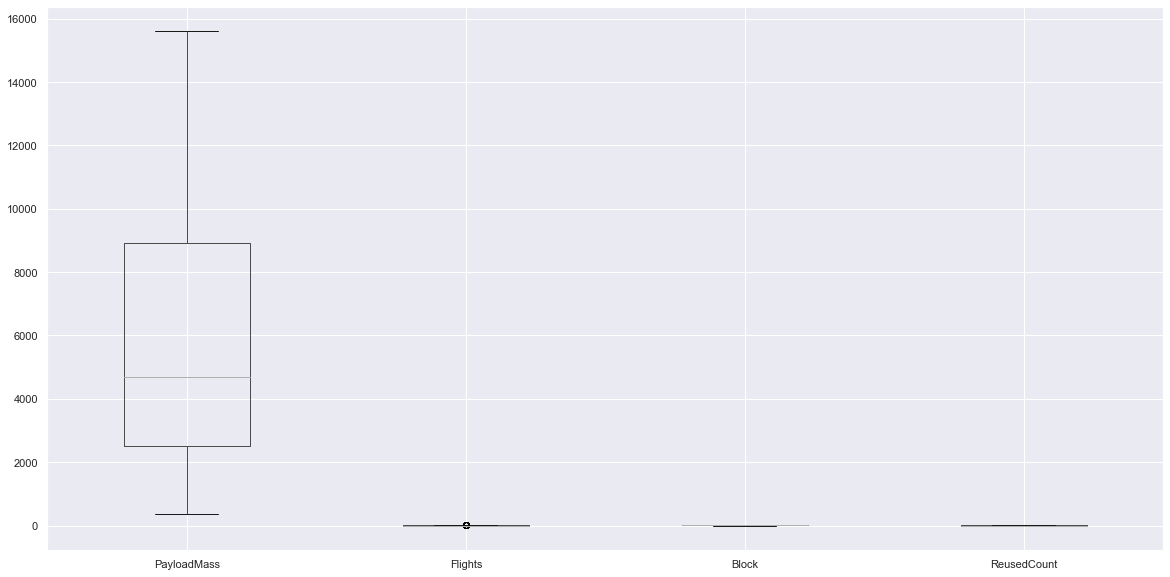

In [58]:
num_data.boxplot(figsize=(20,10))

In [59]:
Z = (num_data-num_data.mean())/num_data.std()
Z.describe()

PayloadMass       Flights         Block   ReusedCount
count  9.000000e+01  9.000000e+01  9.000000e+01  9.000000e+01
mean  -2.652199e-16 -6.784696e-16  1.208910e-16  4.280527e-16
std    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00
min   -1.225849e+00 -6.502698e-01 -1.567115e+00 -9.680173e-01
25%   -7.655933e-01 -6.502698e-01 -9.402691e-01 -9.680173e-01
50%   -2.989473e-01 -6.502698e-01  3.134230e-01 -3.833089e-01
75%    5.980803e-01  1.740159e-01  9.402691e-01  7.861080e-01
max    2.022514e+00  3.471159e+00  9.402691e-01  1.955525e+00

In [60]:
print('Number of rows before discarding outliers = %d' % (data.shape[0]))

z_scores = stats.zscore(num_data)

abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores <= 3).all(axis=1)
#We only selected the z score less than equal to 3 and more than -3

data = data[filtered_entries]
num_data = data[['PayloadMass','Flights','Block','ReusedCount']]

print('Number of rows after discarding outliers = %d' % data.shape[0])

Number of rows before discarding outliers = 90
Number of rows after discarding outliers = 88


## Duplicate Data

In [61]:
dups = data.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


## Perform Standardization

In [62]:
for i in num_data.columns:
    
    # fit on training data column
    scale = StandardScaler().fit(num_data[[i]])
    
    # transform the training data column
    num_data[i] = scale.transform(num_data[[i]])

In [63]:
print('Mean:\n',num_data.mean (axis=0))
print('\nStandard Deviation:\n',num_data.std (axis=0))

Mean:
 PayloadMass   -5.929600e-17
Flights        5.853903e-16
Block          6.812732e-17
ReusedCount    4.415660e-17
dtype: float64

Standard Deviation:
 PayloadMass    1.005731
Flights        1.005731
Block          1.005731
ReusedCount    1.005731
dtype: float64


## Train Test Split

In [64]:
# Load the python library of sklearn
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing data set
num_train, num_test = train_test_split(num_data, test_size = 0.2, random_state = 2)

## Finalize Numerical Training and Test Set

In [65]:
print('Original Dataset Shape: ', num_data.shape)

print("Shape of Numerical training dataset: {}".format(num_train.shape))
print("Shape of Numerical testing dataset: {}".format(num_test.shape))

Original Dataset Shape:  (88, 4)
Shape of Numerical training dataset: (70, 4)
Shape of Numerical testing dataset: (18, 4)


---
# Data Preprocessing (Categorical Data)

<i>(Done by: See Ling Xuan)</i>

## Find Categorical Data

In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88 entries, 0 to 89
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   FlightNumber    88 non-null     int64  
 1   Date            88 non-null     object 
 2   BoosterVersion  88 non-null     object 
 3   PayloadMass     88 non-null     float64
 4   Orbit           88 non-null     object 
 5   LaunchSite      88 non-null     object 
 6   Outcome         88 non-null     object 
 7   Flights         88 non-null     int64  
 8   GridFins        88 non-null     bool   
 9   Reused          88 non-null     bool   
 10  Legs            88 non-null     bool   
 11  LandingPad      62 non-null     object 
 12  Block           88 non-null     float64
 13  ReusedCount     88 non-null     int64  
 14  Serial          88 non-null     object 
 15  Longitude       88 non-null     float64
 16  Latitude        88 non-null     float64
dtypes: bool(3), float64(4), int64(3), obj

### Data Format Correction

In [67]:
data["Class"] = ori_data["Class"].astype("bool")
cat_data = data.select_dtypes(include = {object, bool})
cat_data.head()

Date BoosterVersion Orbit    LaunchSite      Outcome  GridFins  \
0  2010-06-04       Falcon 9   LEO  CCAFS SLC 40    None None     False   
1  2012-05-22       Falcon 9   LEO  CCAFS SLC 40    None None     False   
2  2013-03-01       Falcon 9   ISS  CCAFS SLC 40    None None     False   
3  2013-09-29       Falcon 9    PO   VAFB SLC 4E  False Ocean     False   
4  2013-12-03       Falcon 9   GTO  CCAFS SLC 40    None None     False   

   Reused   Legs LandingPad Serial  Class  
0   False  False        NaN  B0003  False  
1   False  False        NaN  B0005  False  
2   False  False        NaN  B0007  False  
3   False  False        NaN  B1003  False  
4   False  False        NaN  B1004  False

## Selecting Data

In [68]:
cat_data.nunique()

Date              88
BoosterVersion     1
Orbit             11
LaunchSite         3
Outcome            8
GridFins           2
Reused             2
Legs               2
LandingPad         5
Serial            53
Class              2
dtype: int64

### Select Low Variance Data

Since the BoosterVersion feature has only one value, we decided to drop the BoosterVersion feature which is not relevant to our data mining goal

In [69]:
cat_data.drop("BoosterVersion", axis = 1, inplace = True)
cat_data.head(5)

Date Orbit    LaunchSite      Outcome  GridFins  Reused   Legs  \
0  2010-06-04   LEO  CCAFS SLC 40    None None     False   False  False   
1  2012-05-22   LEO  CCAFS SLC 40    None None     False   False  False   
2  2013-03-01   ISS  CCAFS SLC 40    None None     False   False  False   
3  2013-09-29    PO   VAFB SLC 4E  False Ocean     False   False  False   
4  2013-12-03   GTO  CCAFS SLC 40    None None     False   False  False   

  LandingPad Serial  Class  
0        NaN  B0003  False  
1        NaN  B0005  False  
2        NaN  B0007  False  
3        NaN  B1003  False  
4        NaN  B1004  False

## Split Data

Split data into training and testing data set.

In [70]:
# Load the python library of sklearn
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing data set
train, test = train_test_split(cat_data, test_size = 0.2, random_state = 2)

print('Original Dataset Shape: ', cat_data.shape)
print('Training Dataset Shape: ', train.shape)
print('Testing Dataset Shape:', test.shape)

Original Dataset Shape:  (88, 10)
Training Dataset Shape:  (70, 10)
Testing Dataset Shape: (18, 10)


## Cleaning Data (Training Dataset)

### Missing Value In Training Dataset

Identify and calculate the percentage of the missing value of each feature in training dataset

In [71]:
train.isnull().sum()/len(train)*100

Date           0.000000
Orbit          0.000000
LaunchSite     0.000000
Outcome        0.000000
GridFins       0.000000
Reused         0.000000
Legs           0.000000
LandingPad    31.428571
Serial         0.000000
Class          0.000000
dtype: float64

The result shows the percentage of the missing value of the LandingPad feature in the training dataset is 31.43% which is lower than 80%. Therefore, we are not consider to drop the whole column or all records with missing value but decided to replace the missing value with the most frequent value.

In [72]:
# cat_data.mode().loc[0,"LandingPad"]
new_cat_data = train.fillna(train.mode().iloc[0,7])
new_cat_data.head(5).sort_index()

Date Orbit    LaunchSite     Outcome  GridFins  Reused   Legs  \
1   2012-05-22   LEO  CCAFS SLC 40   None None     False   False  False   
18  2016-03-04   GTO  CCAFS SLC 40  False ASDS      True   False   True   
77  2020-04-22  VLEO    KSC LC 39A   True ASDS      True    True   True   
78  2020-05-30   ISS    KSC LC 39A   True ASDS      True   False   True   
86  2020-10-06  VLEO    KSC LC 39A   True ASDS      True    True   True   

                  LandingPad Serial  Class  
1   5e9e3032383ecb6bb234e7ca  B0005  False  
18  5e9e3032383ecb6bb234e7ca  B1020  False  
77  5e9e3032383ecb6bb234e7ca  B1051   True  
78  5e9e3032383ecb6bb234e7ca  B1058   True  
86  5e9e3032383ecb6bb234e7ca  B1058   True

In [73]:
new_cat_data.isnull().sum()

Date          0
Orbit         0
LaunchSite    0
Outcome       0
GridFins      0
Reused        0
Legs          0
LandingPad    0
Serial        0
Class         0
dtype: int64

### Outliers

No outlier detection for categorical data

### Duplicate Data

In [74]:
new_cat_data.duplicated().sum()

0

There is no duplicate record in the training dataset

## Handling Categorical Attributes (Training Dataset)

Before handling the categorical attributes, the number of category of each feature is identified.

In [75]:
# Number of different values per category
orbit_cat = pd.get_dummies(new_cat_data["Orbit"]).shape
launch_site_cat = pd.get_dummies(new_cat_data["LaunchSite"]).shape
landing_pad_cat = pd.get_dummies(new_cat_data["LandingPad"]).shape
serial_cat = pd.get_dummies(new_cat_data["Serial"]).shape

print("Number of category in Orbit: %s"%(orbit_cat[1]))
print("Number of category in LaunchSite: %s"%(launch_site_cat[1]))
print("Number of category in LandingPad: %s"%(landing_pad_cat[1]))
print("Number of category in Serial: %s"%(serial_cat[1]))

Number of category in Orbit: 11
Number of category in LaunchSite: 3
Number of category in LandingPad: 4
Number of category in Serial: 45


Based on the result, we can see that the feature 'Serial' in the training set contains 45 different values which will increase 45 columns to the data set after applied the OneHotEncoder. Consider the low amount of records in the data set, the number of features should be limited to avoid the problem of overfitting. Therefore, the feature 'Serial' will not be applied the OneHotEncoder and considered to be dropped due to it hold less amount of decision compared to other features as said in the Categorical Feature Analysis section.

Generate dummies variable to apply OneHotEncoder to the categorical columns Orbits, LaunchSite, and LandingPad.

In [76]:
columns = ["Orbit", "LaunchSite", "LandingPad"]
dummies = pd.get_dummies(new_cat_data[columns])
output = pd.concat([new_cat_data.drop(columns = columns), dummies], axis = 1)
output.head(5).sort_index()

Date     Outcome  GridFins  Reused   Legs Serial  Class  \
1   2012-05-22   None None     False   False  False  B0005  False   
18  2016-03-04  False ASDS      True   False   True  B1020  False   
77  2020-04-22   True ASDS      True    True   True  B1051   True   
78  2020-05-30   True ASDS      True   False   True  B1058   True   
86  2020-10-06   True ASDS      True    True   True  B1058   True   

    Orbit_ES-L1  Orbit_GEO  Orbit_GTO  ...  Orbit_SO  Orbit_SSO  Orbit_VLEO  \
1             0          0          0  ...         0          0           0   
18            0          0          1  ...         0          0           0   
77            0          0          0  ...         0          0           1   
78            0          0          0  ...         0          0           0   
86            0          0          0  ...         0          0           1   

    LaunchSite_CCAFS SLC 40  LaunchSite_KSC LC 39A  LaunchSite_VAFB SLC 4E  \
1                         1                      0                       0   
18                        1                      0                       0   
77                        0                      1                       0   
78                        0                      1                       0   
86                        0                      1                       0   

    LandingPad_5e9e3032383ecb267a34e7c7  LandingPad_5e9e3032383ecb554034e7c9  \
1                                     0                                    0   
18                                    0                                    0   
77                                    0                                    0   
78                                    0                                    0   
86                                    0                                    0   

    LandingPad_5e9e3032383ecb6bb234e7ca  LandingPad_5e9e3033383ecbb9e534e7cc  
1                                     1                                    0  
18                                    1                                    0  
77                                    1                                    0  
78                                    1                                    0  
86                                    1                                    0  

[5 rows x 25 columns]

In [77]:
print("Number of categorical features before applied OneHotEncoder: %s"%(new_cat_data.shape[1]))
print("Number of categorical features after applied OneHotEncoder: %s"%(output.shape[1]))

Number of categorical features before applied OneHotEncoder: 10
Number of categorical features after applied OneHotEncoder: 25


## Feature Selection (Training Dataset)

### Feature Subset Selection

Identify and calculate the pairwise correlation of each feature pair. Identify and consider whether to drop the feature subset with high pairwise correlation or keep it.

In [78]:
new_cat_data.corr()

GridFins    Reused      Legs     Class
GridFins  1.000000  0.205791  0.881780  0.620785
Reused    0.205791  1.000000  0.112475  0.142665
Legs      0.881780  0.112475  1.000000  0.659296
Class     0.620785  0.142665  0.659296  1.000000

From above result, it shows the feature 'GridFins' and 'Legs' has a very high correlation of 0.88 which is larger than the value of 0.80 to consider very high correlation between two attributes. However, based on the feature definition, there is a low correlation between the two features. Therefore, we decided to not drop the features.

### Construct Data

Consider feature 'Date' is not a relevant feature to predict the future landing outcome of the SpaceX rocket. New feature of 'Month' are decided to be constructed by extracting feature from the feature 'Date' as consider it is a useful feature to the prediction of y.

In [79]:
date = output.loc[:, "Date"]
flight_month = date.apply(lambda x:x.split('-')[1])

output["Date"] = flight_month.values
output.rename(columns = {'Date':'Month'}, inplace = True)
output.head(5).sort_index()

Month     Outcome  GridFins  Reused   Legs Serial  Class  Orbit_ES-L1  \
1     05   None None     False   False  False  B0005  False            0   
18    03  False ASDS      True   False   True  B1020  False            0   
77    04   True ASDS      True    True   True  B1051   True            0   
78    05   True ASDS      True   False   True  B1058   True            0   
86    10   True ASDS      True    True   True  B1058   True            0   

    Orbit_GEO  Orbit_GTO  ...  Orbit_SO  Orbit_SSO  Orbit_VLEO  \
1           0          0  ...         0          0           0   
18          0          1  ...         0          0           0   
77          0          0  ...         0          0           1   
78          0          0  ...         0          0           0   
86          0          0  ...         0          0           1   

    LaunchSite_CCAFS SLC 40  LaunchSite_KSC LC 39A  LaunchSite_VAFB SLC 4E  \
1                         1                      0                       0   
18                        1                      0                       0   
77                        0                      1                       0   
78                        0                      1                       0   
86                        0                      1                       0   

    LandingPad_5e9e3032383ecb267a34e7c7  LandingPad_5e9e3032383ecb554034e7c9  \
1                                     0                                    0   
18                                    0                                    0   
77                                    0                                    0   
78                                    0                                    0   
86                                    0                                    0   

    LandingPad_5e9e3032383ecb6bb234e7ca  LandingPad_5e9e3033383ecbb9e534e7cc  
1                                     1                                    0  
18                                    1                                    0  
77                                    1                                    0  
78                                    1                                    0  
86                                    1                                    0  

[5 rows x 25 columns]

### Remove Feature

Drop the redundant feature 'Outcome' due to it is highly correlated to the y variable 'Class' by it contains True to indicate y = 1 and None or False to indicate y = 0. Also, it contains another information to indicate the landing region but the information is considered useless for our data mining goal to only predict whether the rocket can successfully landed or not.

In [80]:
output.drop("Outcome", axis = 1, inplace = True)
output.head(5).sort_index()

Month  GridFins  Reused   Legs Serial  Class  Orbit_ES-L1  Orbit_GEO  \
1     05     False   False  False  B0005  False            0          0   
18    03      True   False   True  B1020  False            0          0   
77    04      True    True   True  B1051   True            0          0   
78    05      True   False   True  B1058   True            0          0   
86    10      True    True   True  B1058   True            0          0   

    Orbit_GTO  Orbit_HEO  ...  Orbit_SO  Orbit_SSO  Orbit_VLEO  \
1           0          0  ...         0          0           0   
18          1          0  ...         0          0           0   
77          0          0  ...         0          0           1   
78          0          0  ...         0          0           0   
86          0          0  ...         0          0           1   

    LaunchSite_CCAFS SLC 40  LaunchSite_KSC LC 39A  LaunchSite_VAFB SLC 4E  \
1                         1                      0                       0   
18                        1                      0                       0   
77                        0                      1                       0   
78                        0                      1                       0   
86                        0                      1                       0   

    LandingPad_5e9e3032383ecb267a34e7c7  LandingPad_5e9e3032383ecb554034e7c9  \
1                                     0                                    0   
18                                    0                                    0   
77                                    0                                    0   
78                                    0                                    0   
86                                    0                                    0   

    LandingPad_5e9e3032383ecb6bb234e7ca  LandingPad_5e9e3033383ecbb9e534e7cc  
1                                     1                                    0  
18                                    1                                    0  
77                                    1                                    0  
78                                    1                                    0  
86                                    1                                    0  

[5 rows x 24 columns]

Drop the feature 'Serial' due to it contains too many number of category which is not suitable to apply OneHotEncoder in this case and the data is very diverse to contribute less to the y prediction.

In [81]:
output.drop("Serial", axis = 1, inplace = True)
output.head(5).sort_index()

Month  GridFins  Reused   Legs  Class  Orbit_ES-L1  Orbit_GEO  Orbit_GTO  \
1     05     False   False  False  False            0          0          0   
18    03      True   False   True  False            0          0          1   
77    04      True    True   True   True            0          0          0   
78    05      True   False   True   True            0          0          0   
86    10      True    True   True   True            0          0          0   

    Orbit_HEO  Orbit_ISS  ...  Orbit_SO  Orbit_SSO  Orbit_VLEO  \
1           0          0  ...         0          0           0   
18          0          0  ...         0          0           0   
77          0          0  ...         0          0           1   
78          0          1  ...         0          0           0   
86          0          0  ...         0          0           1   

    LaunchSite_CCAFS SLC 40  LaunchSite_KSC LC 39A  LaunchSite_VAFB SLC 4E  \
1                         1                      0                       0   
18                        1                      0                       0   
77                        0                      1                       0   
78                        0                      1                       0   
86                        0                      1                       0   

    LandingPad_5e9e3032383ecb267a34e7c7  LandingPad_5e9e3032383ecb554034e7c9  \
1                                     0                                    0   
18                                    0                                    0   
77                                    0                                    0   
78                                    0                                    0   
86                                    0                                    0   

    LandingPad_5e9e3032383ecb6bb234e7ca  LandingPad_5e9e3033383ecbb9e534e7cc  
1                                     1                                    0  
18                                    1                                    0  
77                                    1                                    0  
78                                    1                                    0  
86                                    1                                    0  

[5 rows x 23 columns]

## Feature Scaling

No feature scaling for categorical data

## Cleaning Data (Testing Dataset)

### Missing Value In Testing Dataset

Identify and calculate the percentage of the missing value of each feature in training dataset

In [82]:
test.isnull().sum()/len(test)*100

Date           0.000000
Orbit          0.000000
LaunchSite     0.000000
Outcome        0.000000
GridFins       0.000000
Reused         0.000000
Legs           0.000000
LandingPad    22.222222
Serial         0.000000
Class          0.000000
dtype: float64

The same method to replace missing value in the training dataset will be applied to the testing dataset. There is 22.22% of missing values in the feature 'LandingPad' in the testing dataset and will be replaced by the most frequent value in the same column of training dataset, which is the value of '5e9e3032383ecb6bb234e7ca'

In [83]:
new_test_data = test.fillna(train.mode().iloc[0,7])
new_test_data.head(5).sort_index()

Date Orbit    LaunchSite     Outcome  GridFins  Reused   Legs  \
0   2010-06-04   LEO  CCAFS SLC 40   None None     False   False  False   
11  2015-01-10   ISS  CCAFS SLC 40  False ASDS      True   False   True   
35  2017-08-14   ISS    KSC LC 39A   True RTLS      True   False   True   
44  2018-01-31   GTO  CCAFS SLC 40  True Ocean      True    True   True   
84  2020-08-30   SSO  CCAFS SLC 40   True RTLS      True    True   True   

                  LandingPad Serial  Class  
0   5e9e3032383ecb6bb234e7ca  B0003  False  
11  5e9e3032383ecb761634e7cb  B1012  False  
35  5e9e3032383ecb267a34e7c7  B1039   True  
44  5e9e3032383ecb6bb234e7ca  B1032   True  
84  5e9e3032383ecb267a34e7c7  B1059   True

In [84]:
new_test_data.isnull().sum()

Date          0
Orbit         0
LaunchSite    0
Outcome       0
GridFins      0
Reused        0
Legs          0
LandingPad    0
Serial        0
Class         0
dtype: int64

### Duplicate Data

In [85]:
new_test_data.duplicated().sum()

0

There is no duplicate record in the testing dataset.

## Handling Categorical Attributes (Testing Dataset)

In [86]:
# Number of different values per category
orbit_cat = pd.get_dummies(new_test_data["Orbit"]).shape
launch_site_cat = pd.get_dummies(new_test_data["LaunchSite"]).shape
landing_pad_cat = pd.get_dummies(new_test_data["LandingPad"]).shape
serial_cat = pd.get_dummies(new_test_data["Serial"]).shape

print("Number of category in Orbit: %s"%(orbit_cat[1]))
print("Number of category in LaunchSite: %s"%(launch_site_cat[1]))
print("Number of category in LandingPad: %s"%(landing_pad_cat[1]))
print("Number of category in Serial: %s"%(serial_cat[1]))

Number of category in Orbit: 6
Number of category in LaunchSite: 3
Number of category in LandingPad: 4
Number of category in Serial: 15


The feature 'Serial' will not be applied the OneHotEncoder as same as in the training dataset. Generate dummies variable to apply OneHotEncoder to the categorical columns Orbits, LaunchSite, and LandingPad.

In [87]:
columns = ["Orbit", "LaunchSite", "LandingPad"]
dummies = pd.get_dummies(new_test_data[columns])
test_output = pd.concat([new_test_data.drop(columns = columns), dummies], axis = 1)
test_output.head(5).sort_index()

Date     Outcome  GridFins  Reused   Legs Serial  Class  Orbit_GTO  \
0   2010-06-04   None None     False   False  False  B0003  False          0   
11  2015-01-10  False ASDS      True   False   True  B1012  False          0   
35  2017-08-14   True RTLS      True   False   True  B1039   True          0   
44  2018-01-31  True Ocean      True    True   True  B1032   True          1   
84  2020-08-30   True RTLS      True    True   True  B1059   True          0   

    Orbit_ISS  Orbit_LEO  Orbit_PO  Orbit_SSO  Orbit_VLEO  \
0           0          1         0          0           0   
11          1          0         0          0           0   
35          1          0         0          0           0   
44          0          0         0          0           0   
84          0          0         0          1           0   

    LaunchSite_CCAFS SLC 40  LaunchSite_KSC LC 39A  LaunchSite_VAFB SLC 4E  \
0                         1                      0                       0   
11                        1                      0                       0   
35                        0                      1                       0   
44                        1                      0                       0   
84                        1                      0                       0   

    LandingPad_5e9e3032383ecb267a34e7c7  LandingPad_5e9e3032383ecb6bb234e7ca  \
0                                     0                                    1   
11                                    0                                    0   
35                                    1                                    0   
44                                    0                                    1   
84                                    1                                    0   

    LandingPad_5e9e3032383ecb761634e7cb  LandingPad_5e9e3033383ecbb9e534e7cc  
0                                     0                                    0  
11                                    1                                    0  
35                                    0                                    0  
44                                    0                                    0  
84                                    0                                    0

In [88]:
print("Number of categorical features before applied OneHotEncoder: %s"%(new_test_data.shape[1]))
print("Number of categorical features after applied OneHotEncoder: %s"%(test_output.shape[1]))

Number of categorical features before applied OneHotEncoder: 10
Number of categorical features after applied OneHotEncoder: 20


Compare the features those had applied OneHotEncoder in the training dataset and the testing dataset and ensure the testing dataset has the same features with the training dataset

In [89]:
# Drop the features those are in the testing dataset but not in the training data set

train_column = output.iloc[:, 5:].columns
test_column = test_output.iloc[:, 7:].columns

drop_column = []
for i in test_column:
    if not (i in train_column):
        drop_column.append(i)
test_output.drop(columns = drop_column, axis = 1, inplace = True)
test_output.iloc[:, 7:].shape

(18, 12)

In [90]:
# Add the features those are in the training dataset but not in the testing dataset, replace the missing values with 0

train_column = output.iloc[:, 5:].columns
test_column = test_output.iloc[:, 7:].columns

add_column = []
for i in train_column:
    if not (i in test_column):
        add_column.append(i)
for j in add_column:
    test_output["%s"%j] = 0
test_output.iloc[:, 7:].shape

(18, 18)

In [91]:
# Compare is the training dataset and the testing dataset contain the same features after applied the OneHotEncoder
train_test = pd.concat([output.iloc[:, 5:], test_output.iloc[:, 7:]], axis = 0)
train_test.shape

(88, 18)

In [92]:
print("Number of categorical features before applied OneHotEncoder: %s"%(new_test_data.shape[1]))
print("Number of categorical features after applied OneHotEncoder: %s"%(test_output.shape[1]))

Number of categorical features before applied OneHotEncoder: 10
Number of categorical features after applied OneHotEncoder: 25


## Feature Selection (Testing Dataset)

In [93]:
# Drop the features those had dropped in the training dataset
# Drop the feature 'Date' and add new feature of 'Month' extracted from Date

test_date = test_output.loc[:, "Date"]
test_flight_month = test_date.apply(lambda x:x.split('-')[1])

test_output.rename(columns = {'Date':'Month'}, inplace = True)
test_output["Month"] = test_flight_month.values
test_output.head(5).sort_index()

Month     Outcome  GridFins  Reused   Legs Serial  Class  Orbit_GTO  \
0     06   None None     False   False  False  B0003  False          0   
11    01  False ASDS      True   False   True  B1012  False          0   
35    08   True RTLS      True   False   True  B1039   True          0   
44    01  True Ocean      True    True   True  B1032   True          1   
84    08   True RTLS      True    True   True  B1059   True          0   

    Orbit_ISS  Orbit_LEO  ...  LaunchSite_VAFB SLC 4E  \
0           0          1  ...                       0   
11          1          0  ...                       0   
35          1          0  ...                       0   
44          0          0  ...                       0   
84          0          0  ...                       0   

    LandingPad_5e9e3032383ecb267a34e7c7  LandingPad_5e9e3032383ecb6bb234e7ca  \
0                                     0                                    1   
11                                    0                                    0   
35                                    1                                    0   
44                                    0                                    1   
84                                    1                                    0   

    LandingPad_5e9e3033383ecbb9e534e7cc  Orbit_ES-L1  Orbit_GEO  Orbit_HEO  \
0                                     0            0          0          0   
11                                    0            0          0          0   
35                                    0            0          0          0   
44                                    0            0          0          0   
84                                    0            0          0          0   

    Orbit_MEO  Orbit_SO  LandingPad_5e9e3032383ecb554034e7c9  
0           0         0                                    0  
11          0         0                                    0  
35          0         0                                    0  
44          0         0                                    0  
84          0         0                                    0  

[5 rows x 25 columns]

In [94]:
# Drop the feature 'Outcome' and 'Serial'

test_output.drop("Outcome", axis = 1, inplace = True)
test_output.drop("Serial", axis = 1, inplace = True)
test_output.head(5).sort_index()

Month  GridFins  Reused   Legs  Class  Orbit_GTO  Orbit_ISS  Orbit_LEO  \
0     06     False   False  False  False          0          0          1   
11    01      True   False   True  False          0          1          0   
35    08      True   False   True   True          0          1          0   
44    01      True    True   True   True          1          0          0   
84    08      True    True   True   True          0          0          0   

    Orbit_PO  Orbit_SSO  ...  LaunchSite_VAFB SLC 4E  \
0          0          0  ...                       0   
11         0          0  ...                       0   
35         0          0  ...                       0   
44         0          0  ...                       0   
84         0          1  ...                       0   

    LandingPad_5e9e3032383ecb267a34e7c7  LandingPad_5e9e3032383ecb6bb234e7ca  \
0                                     0                                    1   
11                                    0                                    0   
35                                    1                                    0   
44                                    0                                    1   
84                                    1                                    0   

    LandingPad_5e9e3033383ecbb9e534e7cc  Orbit_ES-L1  Orbit_GEO  Orbit_HEO  \
0                                     0            0          0          0   
11                                    0            0          0          0   
35                                    0            0          0          0   
44                                    0            0          0          0   
84                                    0            0          0          0   

    Orbit_MEO  Orbit_SO  LandingPad_5e9e3032383ecb554034e7c9  
0           0         0                                    0  
11          0         0                                    0  
35          0         0                                    0  
44          0         0                                    0  
84          0         0                                    0  

[5 rows x 23 columns]

## Finalize Training Dataset And Testing Dataset

In [95]:
cat_train = output
cat_test = test_output

print("Shape of training dataset: {}".format(cat_train.shape))
print("Shape of testing dataset: {}".format(cat_test.shape))

Shape of training dataset: (70, 23)
Shape of testing dataset: (18, 23)


---
## Combine Numerical and Categorical Features

In [96]:
train = pd.merge(num_train, cat_train, left_index=True, right_index=True)
test = pd.merge(num_test, cat_test, left_index=True, right_index=True)

train = train.reset_index().drop(['index'], axis = 1)
test = test.reset_index().drop(['index'], axis = 1)

## Split Output Vector

In [97]:
X_train = train.drop(['Class'], axis = 1)
y_train = train['Class']

X_test = test.drop(['Class'], axis = 1)
y_test = test['Class']

## Summary of Preprocessed Data

In [98]:
print('\nOriginal Dataset')
print('SpaceX:',ori_data.shape)
print('\nPreprocessed and Combined Training Set')
print('X_train_tr:',X_train.shape)
print('y_train   :',y_train.shape)

print('\nPreprocessed and Combined Testing Set')
print('X_test_tr:',X_test.shape)
print('y_test   :',y_test.shape)


Original Dataset
SpaceX: (90, 18)

Preprocessed and Combined Training Set
X_train_tr: (70, 26)
y_train   : (70,)

Preprocessed and Combined Testing Set
X_test_tr: (18, 26)
y_test   : (18,)


---
# Declare Functions

<i>(Done by: Chuah Wenn Jing)</i>

## Training and Cross Validation Functions

These are the functions that will be used in training and cross validating the model

In [99]:
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, precision_recall_curve, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score, cross_validate, cross_val_predict

#Declaration of performance indicators
scores = ['accuracy', 'precision', 'recall', 'f1_macro']
overview = pd.DataFrame(columns = ["Fit Time","Score Time","Accuracy", "Precision", "Recall", "F1 score"])
clf = ["Logistic Regression", "Decision Tree Classifier", "Random Forest Classifier", "KNN Classifier", "Stochastic Gradient Descent", "MLP Classifier"]

y_pred_arr = {} #store the predictions for each classifiers
overview_acc = pd.DataFrame(columns=["Accuracy"]) #an overview of training accuracy

### Training Function 

In [100]:
from sklearn.metrics import f1_score, precision_score, recall_score

def train(model, i):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_train)
    overview_acc.loc[clf[i]] = round(accuracy_score(y_pred, y_train)*100,4)  #store trained accuracy to list

### Cross Validation Function 

In [101]:
def cross_val(model, i, x = X_train, y = y_train):
    model.fit(x, y)
    y_pred = cross_validate(model, x, y, cv= 5, scoring= scores)
    report = pd.DataFrame(y_pred)
    overview.loc[clf[i]] = ["{:.4f}".format(i) for i in report.mean().values] #store cross validate accuracy to list

---
## Model Performance Evaluation Functions
These are the functions that will be used to evaluate the performance of each model

### Classification Report Function

In [102]:
from sklearn.metrics import classification_report
def classifyReport(model, i, x = X_train, y = y_train):
    model.fit(x, y)
    y_pred = cross_val_predict(model, x, y, cv= 5)
    y_pred_arr[clf[i]] = y_pred
    print(clf[i], '\n')
    print('Classification Report:\n')
    print(classification_report(y, y_pred_arr[clf[i]]))
    print()

### Confusion Matrix Function

In [103]:
from sklearn.metrics import confusion_matrix
def confusionMatrix(model, i, x = X_train, y = y_train):
    print(clf[i])
    print('Confusion Matrix:')
    print(confusion_matrix(y,  y_pred_arr[clf[i]]))
    print('\nAccuracy:', accuracy_score(y, y_pred_arr[clf[i]]))
    tn, fp, fn, tp = confusion_matrix(y, y_pred_arr[clf[i]]).ravel()
    print("TN, FP, FN, TP : ", tn, fp, fn, tp)
    print("\n")

### Cross Validation Summary Graph

In [104]:
def cv_sum():
    pd.DataFrame([float(i) for i in overview.Accuracy], index=clf, columns=['Accuracy']).plot.bar()
    plt.legend(bbox_to_anchor=(1.1, 1.05))
    plt.xlabel("Models")
    plt.ylabel("Accuracy Score")
    plt.title("Accuracy Graph")
    plt.show()

### Overview Performance Graph

In [105]:
def performance_sum():
    
    #list of scores
    precision_sco = [float(i) for i in overview['Precision']]
    recall_sco    = [float(i) for i in overview['Recall']]
    f1_sco        = [float(i) for i in overview['F1 score']]

    pd.DataFrame([precision_sco,recall_sco,f1_sco], columns=clf, index=['Precision','Recall','F1 Score']).transpose().plot.bar()
    plt.legend(bbox_to_anchor=(1.1, 1.05))
    plt.xlabel("Models")
    plt.ylabel("Score")
    plt.title("Results")
    plt.show()

### Precision-Recall Curve

In [106]:
def plot_precision_vs_recall(model, i, x = X_train, y = y_train):
    precisions, recalls, thresholds = precision_recall_curve(y, y_pred_arr[clf[i]])
    ax.plot(recalls, precisions, linewidth=3, label = clf[i])
    ax.plot(np.linspace(0, 1, 20), np.linspace(1, 0, 20), 'k--')

### ROC Curve

In [107]:
def plot_roc_curve(i, y = y_train):
    fpr, tpr, treshold = roc_curve(y, y_pred_arr[clf[i]])
    ax.plot(fpr, tpr, linewidth = 3, label = clf[i])
    ax.plot([0,1], [0, 1], 'k--')

---
# Model Training

6 algorithms are used to train the model:
1. Logistic Regression
2. Decision Tree
3. Random Forest
4. K Nearest Neighbour
5. Stochastic Gradient Descent (SGD)
6. Multi-layer Perceptron (MLP)

In [108]:
#Model 1 - Logistic Regression
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression(max_iter=100000)

#Model 2 - Decision Tree
from sklearn.tree import DecisionTreeClassifier
model2 = DecisionTreeClassifier(random_state=1)

#Model 3 - Random Forest
from sklearn.ensemble import RandomForestClassifier
model3 = RandomForestClassifier(random_state=1)

#Model 4 - K-Nearest Neighbour (KNN)
from sklearn.neighbors import KNeighborsClassifier
model4 = KNeighborsClassifier(n_neighbors=14)

#Model 5 - Stochastic Gradient Descent (SGD)
from sklearn.linear_model import SGDClassifier
model5 = SGDClassifier(loss="hinge", penalty="l2", max_iter=200,random_state=42)

#Model 6 - Multi-layer Perceptron (MLP)
from sklearn.neural_network import MLPClassifier
model6 = MLPClassifier()

### Train Accuracy

In [109]:
for i, a in enumerate([model1, model2, model3, model4, model5, model6]):
    train(a, i)

### Cross Validation

In [110]:
for i, a in enumerate([model1, model2, model3, model4, model5, model6]):
    cross_val(a, i)

### Comparison of algorithms' accuracy with and without Cross Validation

#### Before Performing Cross Validation

In [111]:
overview_acc

Accuracy
Logistic Regression           91.4286
Decision Tree Classifier     100.0000
Random Forest Classifier     100.0000
KNN Classifier                77.1429
Stochastic Gradient Descent   91.4286
MLP Classifier                95.7143

* Decision Tree Classifier and Random Forest Classifier are the algorithms with overfitting issues where the model fits against the training data too well.
* Hence, we have to perform k-fold cross validation on all algorithms to resolve overfitting issues.

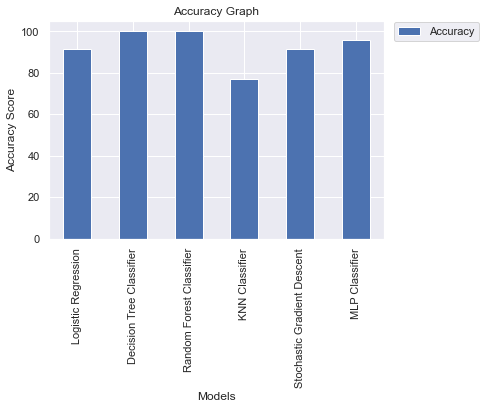

In [112]:
pd.DataFrame([float(i) for i in overview_acc.Accuracy], index=clf, columns=['Accuracy']).plot.bar()
plt.legend(bbox_to_anchor=(1.3, 1.02))
plt.xlabel("Models")
plt.ylabel("Accuracy Score")
plt.title("Accuracy Graph")
plt.show()

#### After Performing Cross Validation 

In [113]:
pd.DataFrame(overview['Accuracy'])

Accuracy
Logistic Regression           0.8143
Decision Tree Classifier      0.7714
Random Forest Classifier      0.8286
KNN Classifier                0.6857
Stochastic Gradient Descent   0.7571
MLP Classifier                0.7714

* We can observe that the accuracy has decreased after performing cross validation.
* The models that were previously overfitted (Decision Tree Classifier & Random Forest Classifier) has now been resolved. 
* The overall accuracy has been decreased, so we have to perform fine tuning to improve the model.

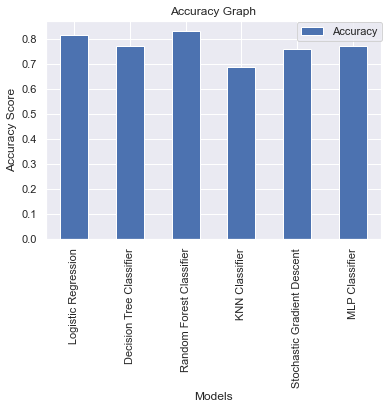

In [114]:
pd.DataFrame([float(i) for i in overview.Accuracy], index=clf, columns=['Accuracy']).plot.bar()
plt.legend(bbox_to_anchor=(1.02, 1.02))
plt.xlabel("Models")
plt.ylabel("Accuracy Score")
plt.title("Accuracy Graph")
plt.show()

### Classification Report

In [115]:
for i, a in enumerate([model1, model2, model3, model4, model5, model6]):
    classifyReport(a, i)

Logistic Regression 

Classification Report:

              precision    recall  f1-score   support

       False       0.73      0.76      0.75        25
        True       0.86      0.84      0.85        45

    accuracy                           0.81        70
   macro avg       0.80      0.80      0.80        70
weighted avg       0.82      0.81      0.82        70


Decision Tree Classifier 

Classification Report:

              precision    recall  f1-score   support

       False       0.65      0.80      0.71        25
        True       0.87      0.76      0.81        45

    accuracy                           0.77        70
   macro avg       0.76      0.78      0.76        70
weighted avg       0.79      0.77      0.78        70


Random Forest Classifier 

Classification Report:

              precision    recall  f1-score   support

       False       0.81      0.68      0.74        25
        True       0.84      0.91      0.87        45

    accuracy                    

### Confusion Matrix 

In [116]:
for i, a in enumerate([model1, model2, model3, model4, model5, model6]):
    confusionMatrix(a, i)

Logistic Regression
Confusion Matrix:
[[19  6]
 [ 7 38]]

Accuracy: 0.8142857142857143
TN, FP, FN, TP :  19 6 7 38


Decision Tree Classifier
Confusion Matrix:
[[20  5]
 [11 34]]

Accuracy: 0.7714285714285715
TN, FP, FN, TP :  20 5 11 34


Random Forest Classifier
Confusion Matrix:
[[17  8]
 [ 4 41]]

Accuracy: 0.8285714285714286
TN, FP, FN, TP :  17 8 4 41


KNN Classifier
Confusion Matrix:
[[12 13]
 [ 9 36]]

Accuracy: 0.6857142857142857
TN, FP, FN, TP :  12 13 9 36


Stochastic Gradient Descent
Confusion Matrix:
[[12 13]
 [ 4 41]]

Accuracy: 0.7571428571428571
TN, FP, FN, TP :  12 13 4 41


MLP Classifier
Confusion Matrix:
[[16  9]
 [ 8 37]]

Accuracy: 0.7571428571428571
TN, FP, FN, TP :  16 9 8 37




* The majority predicted of true positive are the Logistic Regression Classifier and Random Forest Classifier, but for the overall performance is belongs to the Logistic Regression Classifier.

---
### Cross Validation Graph

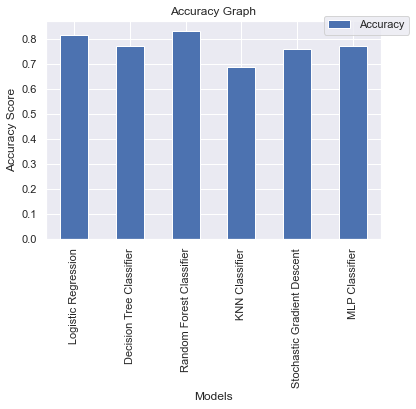

In [117]:
cv_sum()

### Overall Performance

In [118]:
overview

Fit Time Score Time Accuracy Precision  Recall  \
Logistic Regression           0.0170     0.0044   0.8143    0.8692  0.8444   
Decision Tree Classifier      0.0028     0.0062   0.7714    0.8762  0.7556   
Random Forest Classifier      0.1078     0.0098   0.8286    0.8545  0.9111   
KNN Classifier                0.0022     0.0040   0.6857    0.7421  0.8000   
Stochastic Gradient Descent   0.0040     0.0050   0.7571    0.7718  0.9111   
MLP Classifier                0.0988     0.0034   0.7714    0.8264  0.8222   

                            F1 score  
Logistic Regression           0.7987  
Decision Tree Classifier      0.7608  
Random Forest Classifier      0.7958  
KNN Classifier                0.6373  
Stochastic Gradient Descent   0.6926  
MLP Classifier                0.7508

* Logistic Regression Classifier achieves an accuracy of 81.43%, precision of 86.92% and f1 score of 79.87% which is the highest among all algorithms. Besides, its f1 score is also the highest among all algorithms. 

* The results of Logistic Regression is comparable to Random Forest Classifier and each are better in some aspects. We want the model with equally good precision and recall. Hence, we can look at the f1 score to evaluate this, and logistic regression is better than random forest classifier. 


### Overall Performance Graph

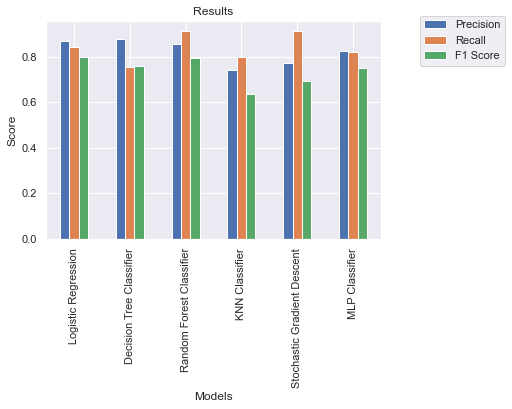

In [119]:
performance_sum()

* As can be observed from the graph, Logistic Regression Classifier has the best overall performance when compared with the other algorithms.

### Precision-Recall Curve

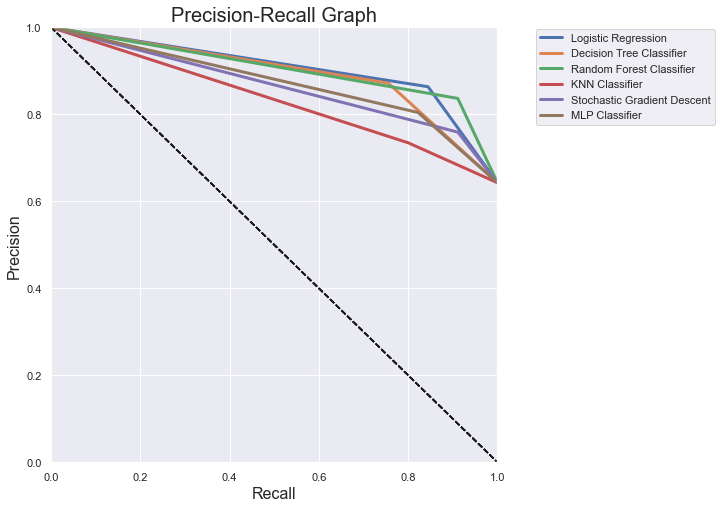

In [120]:
fig, ax = plt.subplots(figsize=(8,8))

for i in range(6):
    plot_precision_vs_recall(y_pred_arr[clf[i]], i)

ax.axis([0, 1, 0, 1])
ax.legend(bbox_to_anchor=(1.5, 1.01))
plt.xlabel("Recall", fontsize=16)
plt.ylabel("Precision", fontsize=16)
plt.title ('Precision-Recall Graph', fontsize = 20)
plt.show()

* We can see that the Logistic Regression Classifier is the closest to the top right hand corner, while the KNN Classifier is the most far away from the top right hand corner.
* Therefore, we can consider that the Logistic Regression Classifier is a good model for this dataset.

### ROC Curve

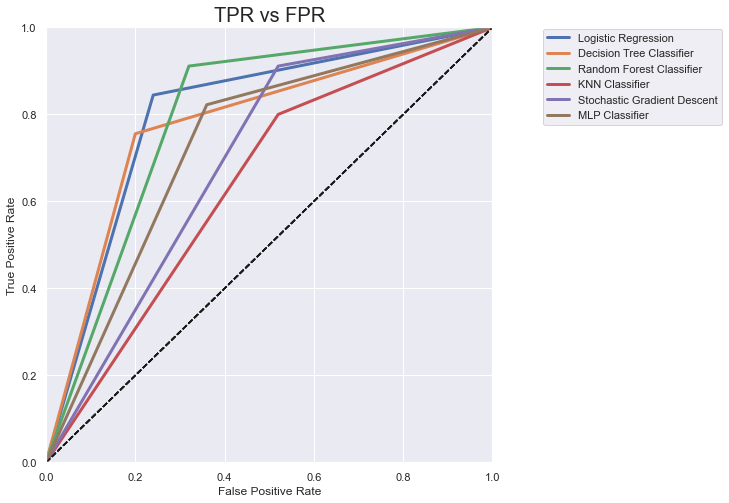

In [121]:
fig, ax = plt.subplots(figsize=(8,8))

for i in range(6):
    plot_roc_curve(i)

ax.axis([0, 1, 0, 1])
ax.legend(bbox_to_anchor=(1.1, 1.01))

plt.xlabel ('False Positive Rate')
plt.ylabel ('True Positive Rate')
plt.title('TPR vs FPR', fontsize=20)
plt.show()

* Again, the closest to the top left hand corner is belongs to the Logistic Regression Classifier, while the KNN Classifier is the worst classifier in this ROC curve.

### AUC Score

In [122]:
roc_auc_score_arr = [roc_auc_score(y_train, y_pred_arr[clf[i]]) for i in range(6)]
auc_score_report = pd.DataFrame(roc_auc_score_arr, columns=["AUC Score"], index = clf)
auc_score_report

AUC Score
Logistic Regression           0.802222
Decision Tree Classifier      0.777778
Random Forest Classifier      0.795556
KNN Classifier                0.640000
Stochastic Gradient Descent   0.695556
MLP Classifier                0.731111

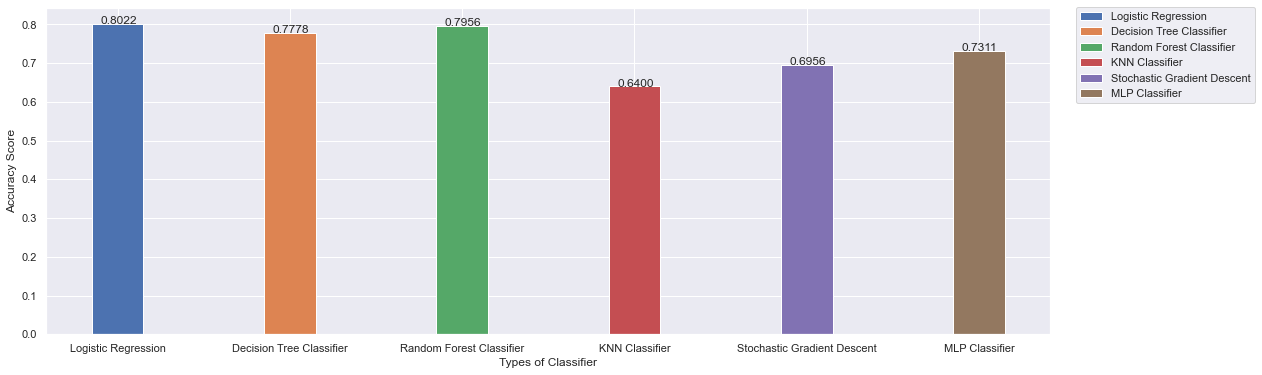

In [123]:
temp = auc_score_report["AUC Score"]
width = 0.3

fig, ax = plt.subplots(figsize=(18,6))

x1 = np.arange(len(temp))
for i in range(len(temp)):
    ax.bar(i,temp[i],width, label=overview.index[i])
    ax.text(i-0.10,temp[i],"{:.4f}".format(temp[i]))

ax.legend(bbox_to_anchor=(1.02, 1.02))
plt.xticks(x1,overview.index)
plt.xlabel("Types of Classifier")
plt.ylabel("Accuracy Score")
plt.show()

* Logistic Regression Classifier has AUC score of 0.8022, which is the highest among all algorithms.
* Hence, we can conclude that out of all the algorithms, Logistic Regression Classifier can most accurately distinguish between classes.

---
# Fine Tune Model

<i>(Done by: Lee Jia Sheng)</i>

So, now we have determined that Logistic Regression is the most suitable algorithm, we shall now fine tune the model. Each model comes with different hyperparameters. Hyperparameters are the settings of a machine learning that needs to be set prior to training. To find the best hyperparameter values for these settings, we shall use the Grid Search.

In [124]:
#Build Logistic Regression with Hyperparameter
logModel = LogisticRegression()


# Create param grid.
param_grid = [    
    {
    'penalty' : ['l1', 'l2'],
    'C' : [0.01,0.1,1,10,100],
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }
]

In [125]:
#Import Grid Search
from sklearn.model_selection import GridSearchCV

# Create grid search object
clf = GridSearchCV(logModel, param_grid = param_grid, cv = 10, verbose=True, n_jobs=-1, scoring= 'accuracy')

# Fit on data
best_clf = clf.fit(X_train,y_train)

Fitting 10 folds for each of 200 candidates, totalling 2000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 1812 tasks      | elapsed:    6.3s
[Parallel(n_jobs=-1)]: Done 2000 out of 2000 | elapsed:    7.4s finished


In [126]:
means = best_clf.cv_results_['mean_test_score']
stds = best_clf.cv_results_['std_test_score']
params = best_clf.cv_results_['params']
    
#0.871429 (0.118666) with: {'C': 1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'newton-cg'}

In [127]:
print('Best Hyperparameter Settings:', best_clf.best_params_)
print('Best Hyperparameter Settings:', best_clf.best_score_)

Best Hyperparameter Settings: {'C': 10, 'max_iter': 100, 'penalty': 'l2', 'solver': 'sag'}
Best Hyperparameter Settings: 0.8714285714285716


In [128]:
#Predict values based on new parameters
y_pred_acc = best_clf.predict(X_train)

In [129]:
# New Model Evaluation metrics 
print('Accuracy Score : ' + str(accuracy_score(y_train,y_pred_acc)))
print('Precision Score : ' + str(precision_score(y_train,y_pred_acc)))
print('Recall Score : ' + str(recall_score(y_train,y_pred_acc)))
print('F1 Score : ' + str(f1_score(y_train,y_pred_acc)))

#Logistic Regression Classifier Confusion matrix
from sklearn.metrics import confusion_matrix
print('Confusion Matrix : \n' + str(confusion_matrix(y_train,y_pred_acc)))

Accuracy Score : 0.9
Precision Score : 0.9130434782608695
Recall Score : 0.9333333333333333
F1 Score : 0.9230769230769231
Confusion Matrix : 
[[21  4]
 [ 3 42]]


---
# Model Testing

<i>(Done by: Lok Xuan Wen)</i>

Test the Hypertuned Logistic Regression and compare it with the other algorithms

In [130]:
best_model = best_clf.best_estimator_
best_model

LogisticRegression(C=10, solver='sag')

In [131]:
#reset the overview dataframe & y_pred accuracy 
overview = pd.DataFrame(columns=["Fit time","Score time","Accuracy","Precision","Recall","F1 score"])
y_pred_arr = {}

#original classifier
clf = ["Logistic Regression", "Decision Tree Classifier", "Random Forest Classifier", "KNN Classifier", "Stochastic Gradient Descent", "MLP Classifier"]

#new Data
clf.append("Logistic Regression (Fine Tuned)")

In [132]:
##Model 1 - Logistic Regression
model1 = LogisticRegression(max_iter=100000)
cross_val(model1, 0, X_test, y_test)

##Model 2 - Decision Tree
model2 = DecisionTreeClassifier(random_state=1)
cross_val(model2, 1, X_test, y_test)

##Model 3 - Random Forest 
model3 = RandomForestClassifier(random_state=1)
cross_val(model3, 2, X_test, y_test)

##Model 4 - K-Nearest Neighbour (KNN)
model4 = KNeighborsClassifier(n_neighbors=14)
cross_val(model4, 3, X_test, y_test)

##Model 5 - Stochastic Gradient Descent (SGD)
model5 = SGDClassifier(loss="hinge", penalty="l2", max_iter=200,random_state=42)
cross_val(model5, 4, X_test, y_test)

##Model 6 - Multi-layer Perceptron (MLP)
model6 = MLPClassifier()
cross_val(model6, 5, X_test, y_test)

##Model7 - Logistic Regression (Tuned Hyperparameter)
model7 = best_model
cross_val(model7, 6, X_test, y_test)

### Classification Report (Test Set)

In [133]:
for i, a in enumerate([model1, model2, model3, model4, model5, model6, model7]):
    classifyReport(a, i, X_test, y_test)

Logistic Regression 

Classification Report:

              precision    recall  f1-score   support

       False       1.00      0.60      0.75         5
        True       0.87      1.00      0.93        13

    accuracy                           0.89        18
   macro avg       0.93      0.80      0.84        18
weighted avg       0.90      0.89      0.88        18


Decision Tree Classifier 

Classification Report:

              precision    recall  f1-score   support

       False       1.00      0.80      0.89         5
        True       0.93      1.00      0.96        13

    accuracy                           0.94        18
   macro avg       0.96      0.90      0.93        18
weighted avg       0.95      0.94      0.94        18


Random Forest Classifier 

Classification Report:

              precision    recall  f1-score   support

       False       1.00      0.80      0.89         5
        True       0.93      1.00      0.96        13

    accuracy                    

### Confusion Matrix (Test Set)

In [134]:
for i, a in enumerate([model1, model2, model3, model4, model5, model6, model7]):
    confusionMatrix(a, i, X_test, y_test)

Logistic Regression
Confusion Matrix:
[[ 3  2]
 [ 0 13]]

Accuracy: 0.8888888888888888
TN, FP, FN, TP :  3 2 0 13


Decision Tree Classifier
Confusion Matrix:
[[ 4  1]
 [ 0 13]]

Accuracy: 0.9444444444444444
TN, FP, FN, TP :  4 1 0 13


Random Forest Classifier
Confusion Matrix:
[[ 4  1]
 [ 0 13]]

Accuracy: 0.9444444444444444
TN, FP, FN, TP :  4 1 0 13


KNN Classifier
Confusion Matrix:
[[ 0  5]
 [ 0 13]]

Accuracy: 0.7222222222222222
TN, FP, FN, TP :  0 5 0 13


Stochastic Gradient Descent
Confusion Matrix:
[[ 4  1]
 [ 0 13]]

Accuracy: 0.9444444444444444
TN, FP, FN, TP :  4 1 0 13


MLP Classifier
Confusion Matrix:
[[ 4  1]
 [ 0 13]]

Accuracy: 0.9444444444444444
TN, FP, FN, TP :  4 1 0 13


Logistic Regression (Fine Tuned)
Confusion Matrix:
[[ 4  1]
 [ 0 13]]

Accuracy: 0.9444444444444444
TN, FP, FN, TP :  4 1 0 13




### Accuracy Graph (Test Set)

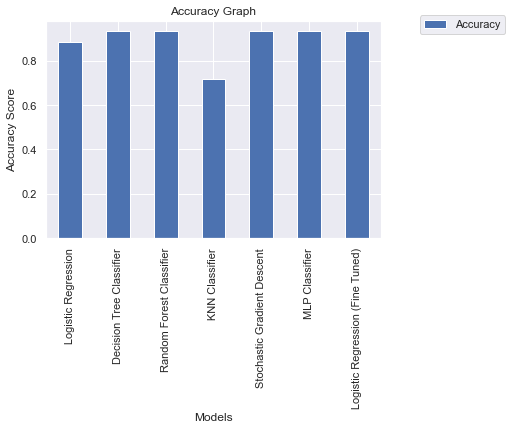

In [135]:
cv_sum()

### Overall Performance (Test Set)

In [136]:
overview

Fit time Score time Accuracy Precision  \
Logistic Regression                0.0102     0.0058   0.8833    0.8833   
Decision Tree Classifier           0.0028     0.0038   0.9333    0.9333   
Random Forest Classifier           0.1600     0.0150   0.9333    0.9333   
KNN Classifier                     0.0034     0.0068   0.7167    0.7167   
Stochastic Gradient Descent        0.0020     0.0038   0.9333    0.9333   
MLP Classifier                     0.1106     0.0056   0.9333    0.9333   
Logistic Regression (Fine Tuned)   0.0030     0.0060   0.9333    0.9333   

                                  Recall F1 score  
Logistic Regression               1.0000   0.7657  
Decision Tree Classifier          1.0000   0.8800  
Random Forest Classifier          1.0000   0.8800  
KNN Classifier                    1.0000   0.4171  
Stochastic Gradient Descent       1.0000   0.8800  
MLP Classifier                    1.0000   0.8800  
Logistic Regression (Fine Tuned)  1.0000   0.8800

The accuracy, precision and f1 score of the Hyperparameter Tuned Logistics Regression is higher than the Logistics Regression before Hyperparameter Tuning.

### Overall Performance Chart (Test Set)

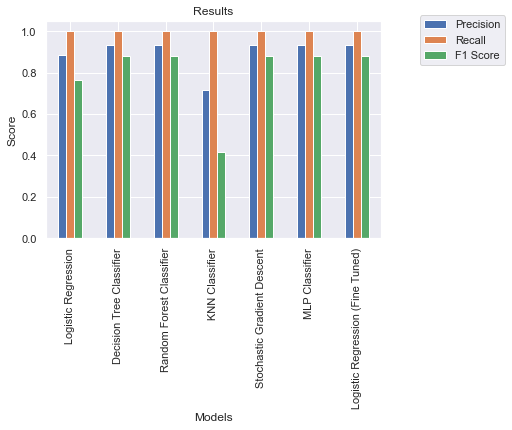

In [137]:
performance_sum()

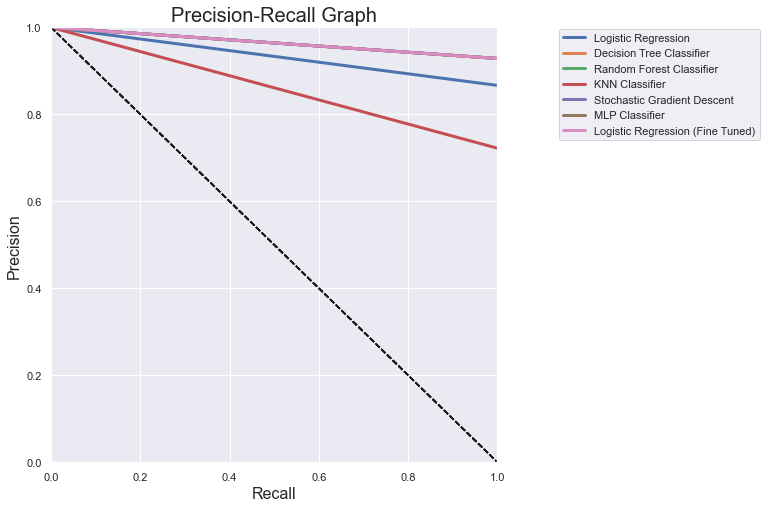

In [138]:
fig, ax = plt.subplots(figsize=(8,8))

for i in range(7):
    plot_precision_vs_recall(y_pred_arr[clf[i]], i, X_test, y_test)

ax.axis([0, 1, 0, 1])
ax.legend(bbox_to_anchor=(1.6, 1.01))
plt.xlabel("Recall", fontsize=16)
plt.ylabel("Precision", fontsize=16)
plt.title ('Precision-Recall Graph', fontsize = 20)
plt.show()

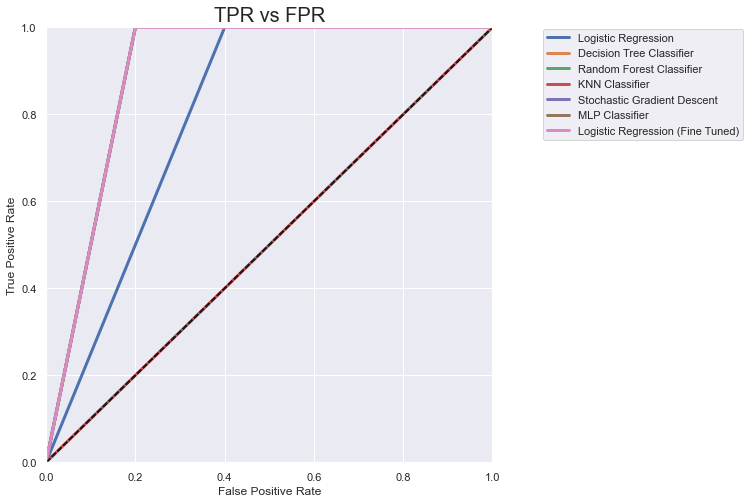

In [139]:
fig, ax = plt.subplots(figsize=(8,8))

for i in range(7):
    plot_roc_curve(i, y_test)

ax.axis([0, 1, 0, 1])
ax.legend(bbox_to_anchor=(1.1, 1.01))

plt.xlabel ('False Positive Rate')
plt.ylabel ('True Positive Rate')
plt.title('TPR vs FPR', fontsize=20)
plt.show()

### AUC Score (Test Set)

In [140]:
roc_auc_score_arr = [roc_auc_score(y_test, y_pred_arr[clf[i]]) for i in range(7)]
auc_score_report = pd.DataFrame(roc_auc_score_arr, columns=["AUC Score"], index = clf)
auc_score_report

AUC Score
Logistic Regression                     0.8
Decision Tree Classifier                0.9
Random Forest Classifier                0.9
KNN Classifier                          0.5
Stochastic Gradient Descent             0.9
MLP Classifier                          0.9
Logistic Regression (Fine Tuned)        0.9

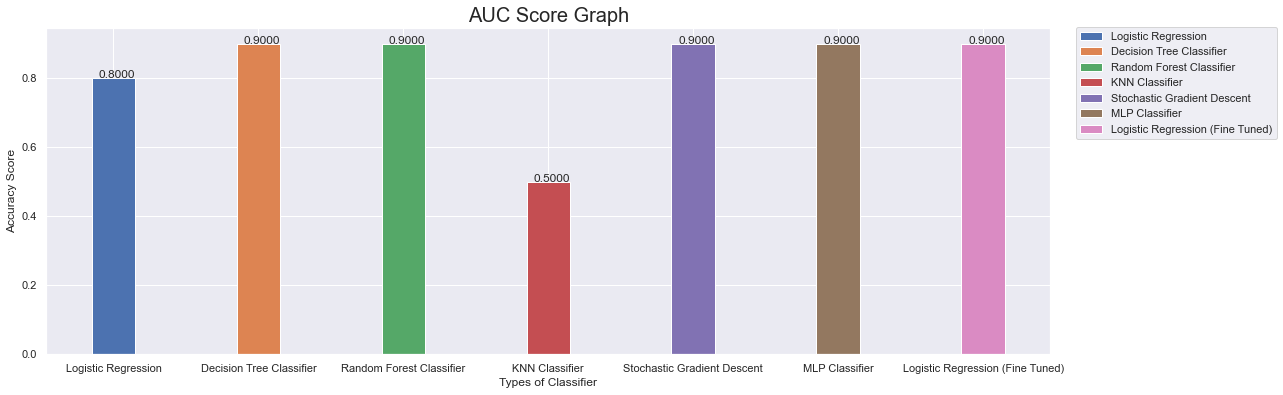

In [141]:
temp = auc_score_report["AUC Score"]
width = 0.3

fig, ax = plt.subplots(figsize=(18,6))

x1 = np.arange(len(temp))
for i in range(len(temp)):
    ax.bar(i,temp[i],width, label=overview.index[i])
    ax.text(i-0.10,temp[i],"{:.4f}".format(temp[i]))

ax.legend(bbox_to_anchor=(1.02, 1.02))
plt.xticks(x1,overview.index)
plt.xlabel("Types of Classifier")
plt.ylabel("Accuracy Score")
plt.title('AUC Score Graph', fontsize=20)
plt.show()

- Fine Tuned Logistic Regression is one of the best performer along with Decision Tree Classifier, Random Forest Classifier, Stochastic Gradient Descent, and MLP Classifier.

---
# Feature Importance

<i>(Done by: Lim Jason)</i>

## Logistic Regression (Tuned)

In [142]:
importance = best_model.coef_[0]

features = X_train.columns
important_list = sorted(zip(importance,features), reverse=True)
important_table = pd.DataFrame(important_list, columns=['Score','Feature'])

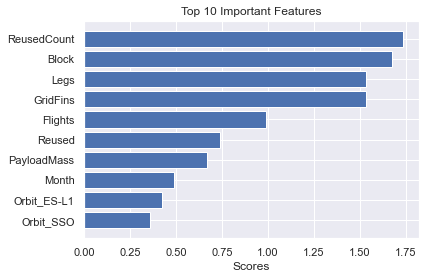

In [143]:
y = range(10) # only display 10 features
top10feature = important_table[:10]['Feature']
top10score = important_table[:10]['Score']

# Displays starting from the most important feature to the least
plt.title('Top 10 Important Features')
plt.barh(y,top10score[::-1], align='center') 
plt.yticks(y,top10feature[::-1])
plt.xlabel('Scores')
plt.show()

We can observe that among the top 10 important features determined by the best model, ReusedCount and Block both play a crucial role in determining whether a SpaceX rocket can land successfully or not. 

Legs and Gridfins play quite an important role as well and can be considered a significant factor in ensuring that a SpaceX rocket can land successfully.

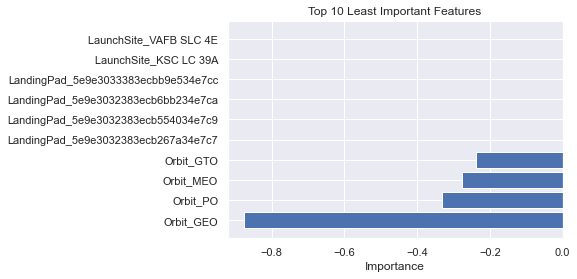

In [144]:
last10feature = important_table[-10:]['Feature']
last10score = important_table[-10:]['Score']

# Displays starting from the most important feature to the least
plt.title('Top 10 Least Important Features')
plt.barh(y, last10score[::-1], align='center')  # [::-1] starts from end to the first index
plt.yticks(y, last10feature[::-1])
plt.xlabel('Importance')
plt.show()

We can observe that among the top 10 least important features determined by the best model, Orbit_GEO is the least important feature to determine if the SpaceX rocket can land successfully or not, followed by Orbit_PO.

Orbit_MEO and Orbit_GTO are equally as bad at predicted the SpaceX rocket landing success.

## Random Forest Classifier

In [145]:
importantFeature = model3.feature_importances_
features = X_train.columns
important_list = sorted(zip(importantFeature,features), reverse=True)
important_table = pd.DataFrame(important_list, columns=['Score','Feature'])

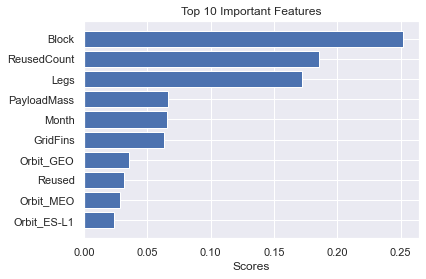

In [146]:
y = range(10) # only display 10 features
top10feature = important_table[:10]['Feature']
top10score = important_table[:10]['Score']

# Displays starting from the most important feature to the least
plt.title('Top 10 Important Features')
plt.barh(y,top10score[::-1], align='center') 
plt.yticks(y,top10feature[::-1])
plt.xlabel('Scores')
plt.show()

Random Forest Model was performing well for training and testing set. Therefore, it is selected to determining the feature importance so that we can contrast the difference of feature importance determined by the best model and random forest model. 

According to Random Forest Model, Block is the most important feature followed by ReusedCount. Then, proceeded by Legs and PayloadMass. Out of the four important features determined by Random Forest model, three of the features are the same but with different order. Therefore, we can conclude that Block, ReusedCount and Legs are the most important features in determining if a SpaceX rocket will land successfully or not.

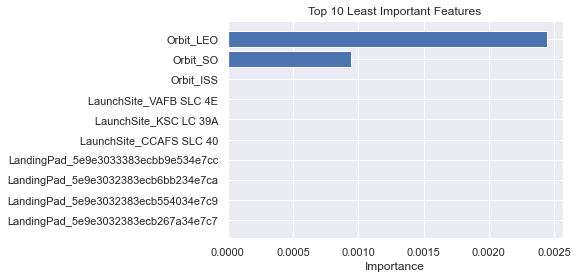

In [147]:
last10feature = important_table[-10:]['Feature']
last10score = important_table[-10:]['Score']

# Displays starting from the most important feature to the least
plt.title('Top 10 Least Important Features')
plt.barh(y, last10score[::-1], align='center')  # [::-1] starts from end to the first index
plt.yticks(y, last10feature[::-1])
plt.xlabel('Importance')
plt.show()

For Random Forest models, the top 10 least important features determined by the best model, Orbit_LEO is the least important feature to determine if the SpaceX rocket can land successfully or not, followed by Orbit_SO. This result is dissmilar to the result determined by the best model. Therefore, we cannot conclude that which is the least important feature.